In [1]:
import os
os.chdir("../")
with open('run/settings.py', 'r') as file:
    exec(file.read())

Random seed set to 333
using device:  cpu


# Configuration (customizable)

In [2]:
overwrite = True
with open('run/configs/nicu.py', 'r') as file:
    exec(file.read())
update_config(model_name = 'nicu',
              custom_target_cols = ['label'])
config_dict = get_config_dict()

# Data

In [3]:
# change data preparation for a given experiment
with open('run/prepare_datasets/nicu.py', 'r') as file:
    exec(file.read())
# prepare model inputs
with open('run/inputs.py', 'r') as file:
    exec(file.read())



Sample of patients with positive labels:
VitalID
1018    8
5170    8
1835    8
2361    8
2791    8
dtype: int64


Processing descriptions: 100%|██████████| 131/131 [00:26<00:00,  5.01it/s]


replace 'text' with:  ts_description
text
Moderate variability. Moderate amount of consecutive increases. No events.    25032
High variability. Moderate amount of consecutive increases. No events.         8407
Low variability. Low amount of consecutive increases. No events.               7497
Low variability. Moderate amount of consecutive increases. No events.          6267
High variability. High amount of consecutive increases. No events.             5162
Name: count, dtype: int64

Sample of patients with positive labels:
TestID
508     8
707     8
1903    8
817     8
1414    7
dtype: int64


Processing descriptions: 100%|██████████| 123/123 [00:18<00:00,  6.57it/s]


replace 'text' with:  ts_description
text
Moderate variability. Moderate amount of consecutive increases. No events.    22026
Low variability. Low amount of consecutive increases. No events.               9493
High variability. Moderate amount of consecutive increases. No events.         6287
High variability. High amount of consecutive increases. No events.             5965
Low variability. Moderate amount of consecutive increases. No events.          5838
Name: count, dtype: int64
After downsampling:
description_succ_inc
Moderate amount of consecutive increases.    15000
Low amount of consecutive increases.         11838
High amount of consecutive increases.        10352
Name: count, dtype: int64
After downsampling:
description_succ_inc
Moderate amount of consecutive increases.    15000
Low amount of consecutive increases.          6582
High amount of consecutive increases.         5930
Name: count, dtype: int64
After downsampling:
description_succ_inc
Moderate amount of consecutive 

# Model (customizable)

In [4]:
# overwrite = False
with open('run/model.py', 'r') as file:
    exec(file.read())


Layer (type:depth-idx)                                                      Param #
VITAL                                                                       --
├─TSVAEEncoder: 1-1                                                         --
│    └─LocalNorm: 2-1                                                       --
│    └─MultiCNNEncoder: 2-2                                                 768
│    │    └─ModuleList: 3-1                                                 7,381,024
│    │    └─MultiheadAttention: 3-2                                         2,362,368
│    │    └─LayerNorm: 3-3                                                  1,536
│    └─Linear: 2-3                                                          590,592
│    └─Linear: 2-4                                                          590,592
├─TextEncoder: 1-2                                                          --
│    └─TextEncoderMultiCNN: 2-5                                             768
│    │    └─Module

# Train

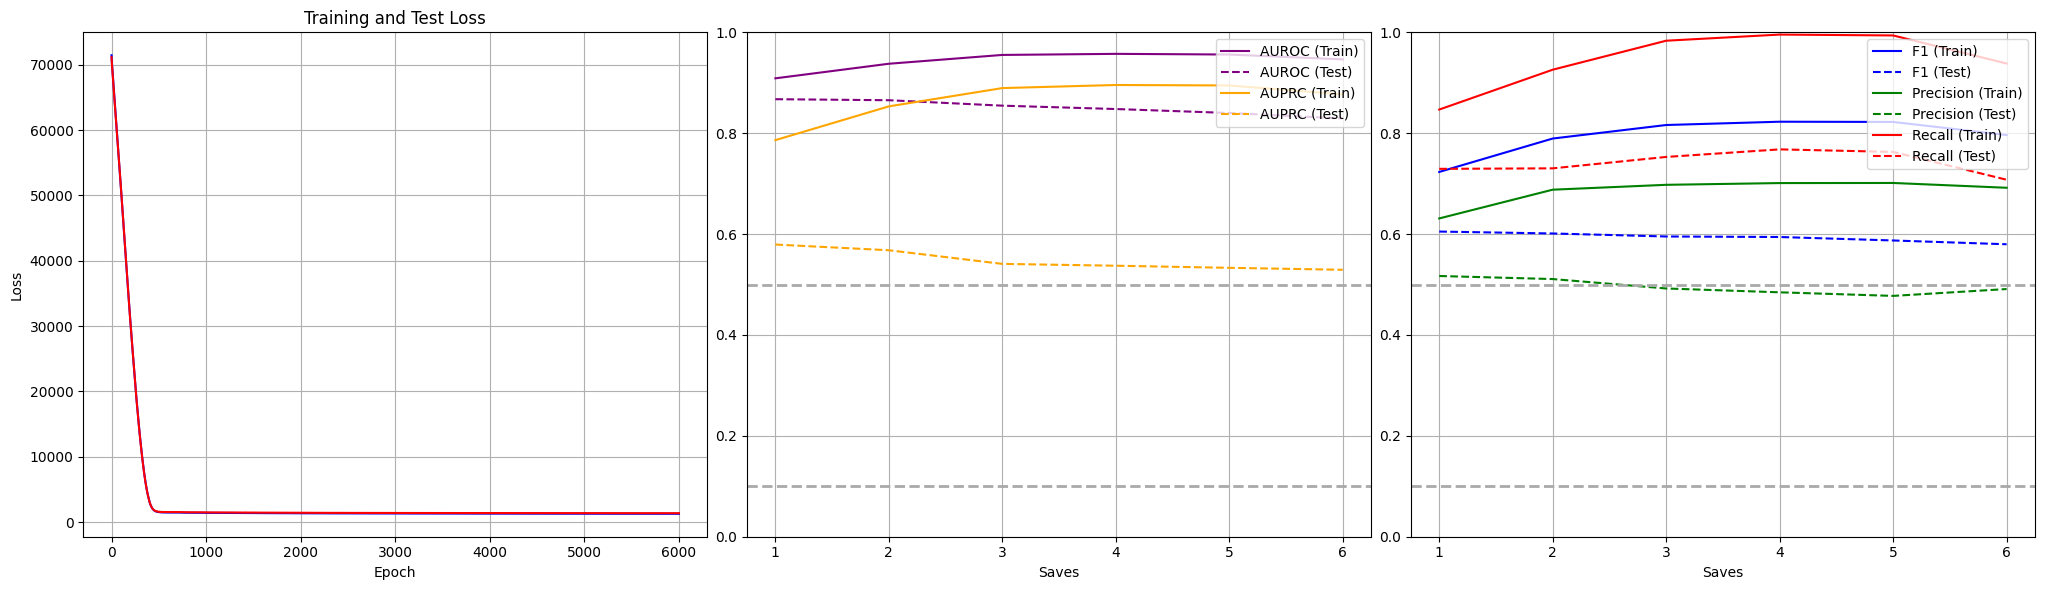

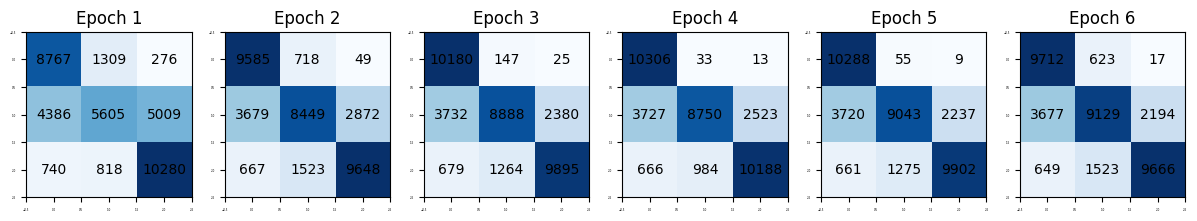

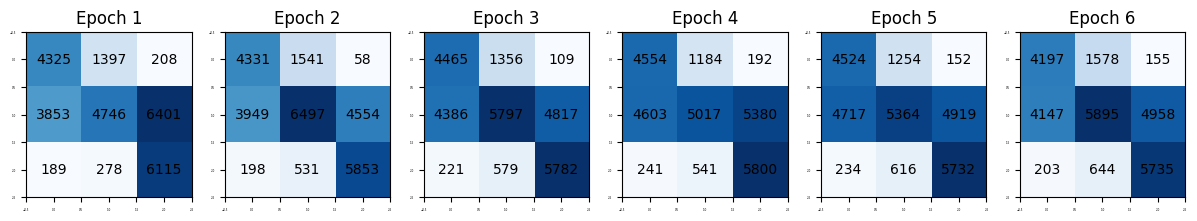

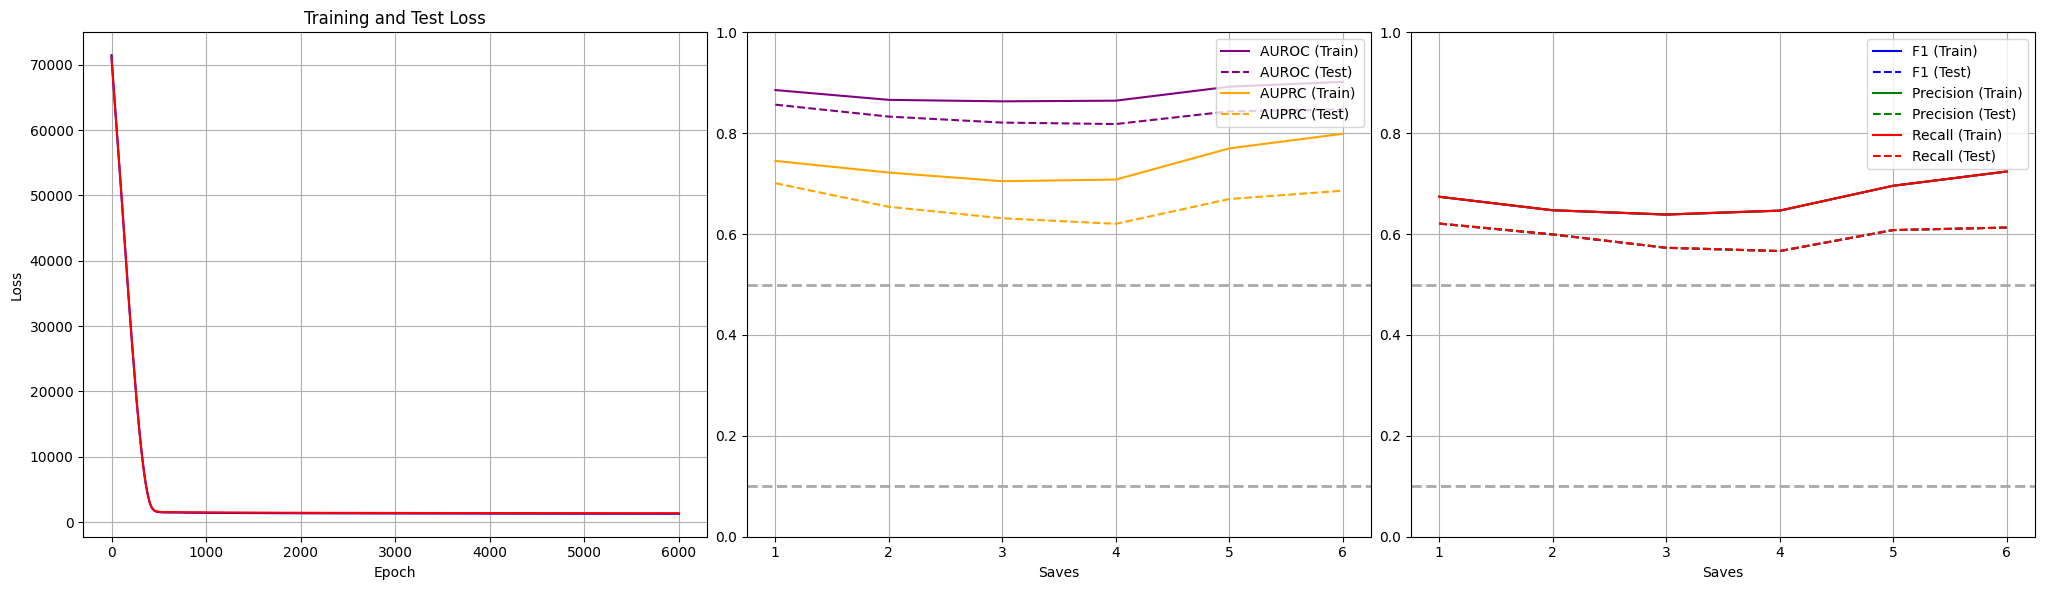

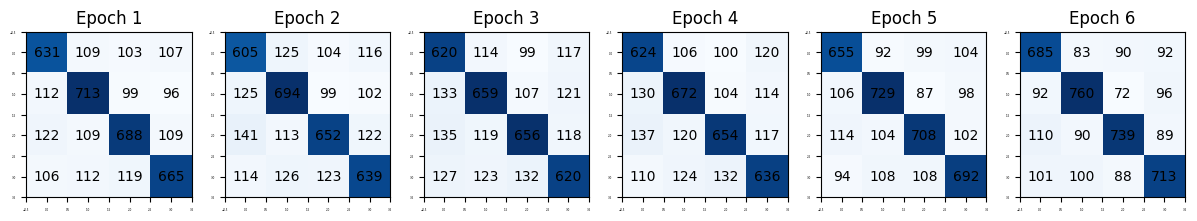

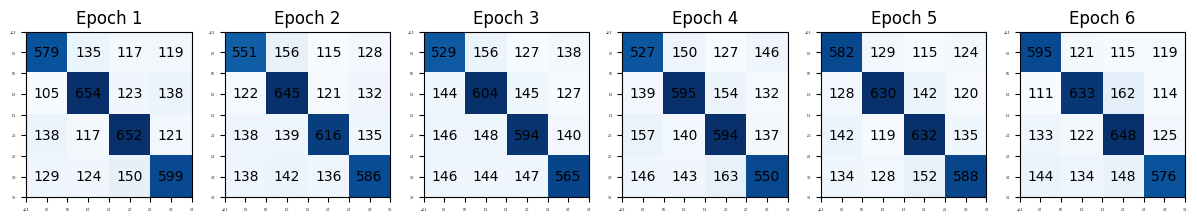

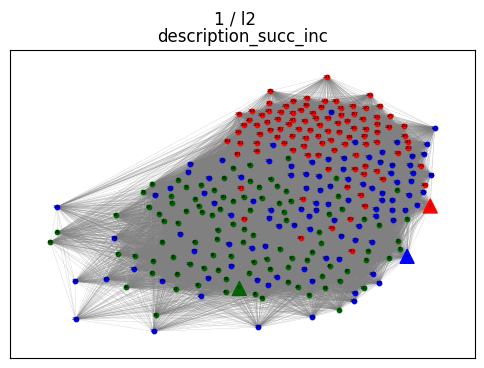

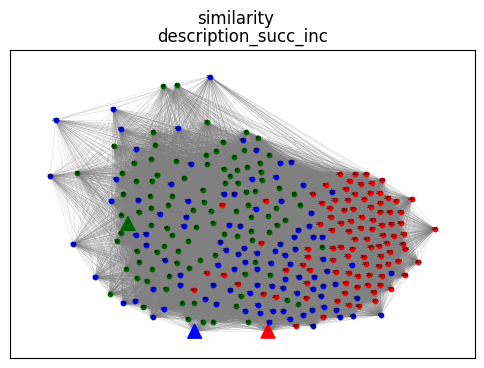

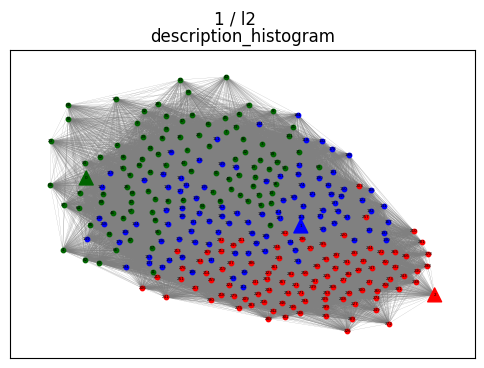

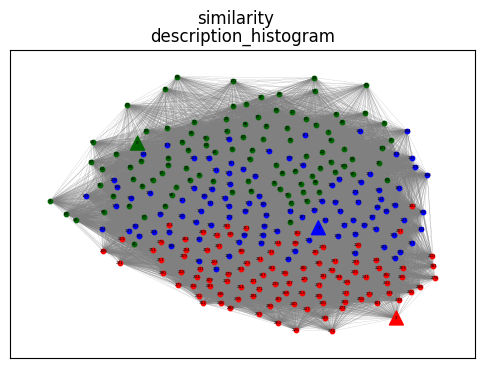

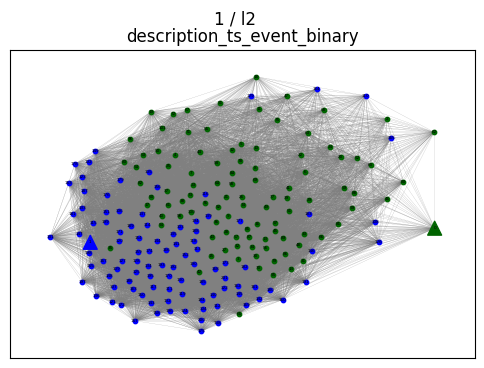

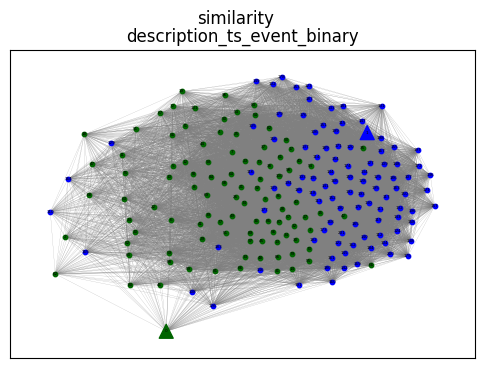

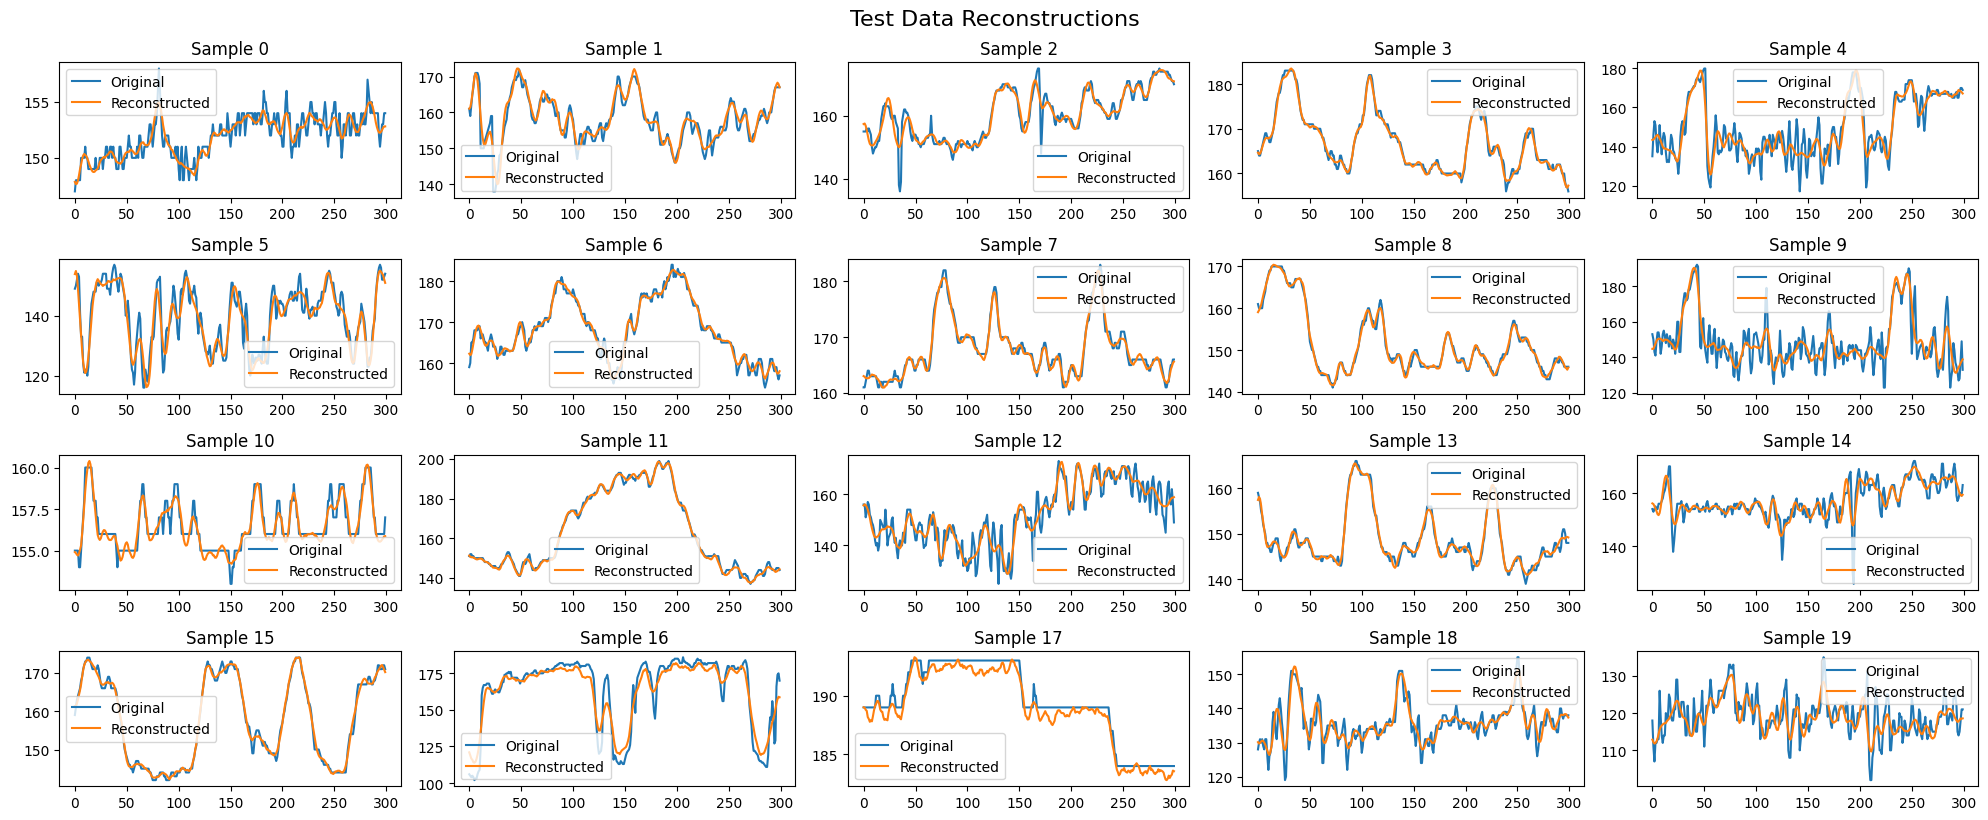

In [5]:
with open('run/train.py', 'r') as file:
    exec(file.read())


# Generation

0    High amount of consecutive increases.
Name: description_succ_inc, dtype: object


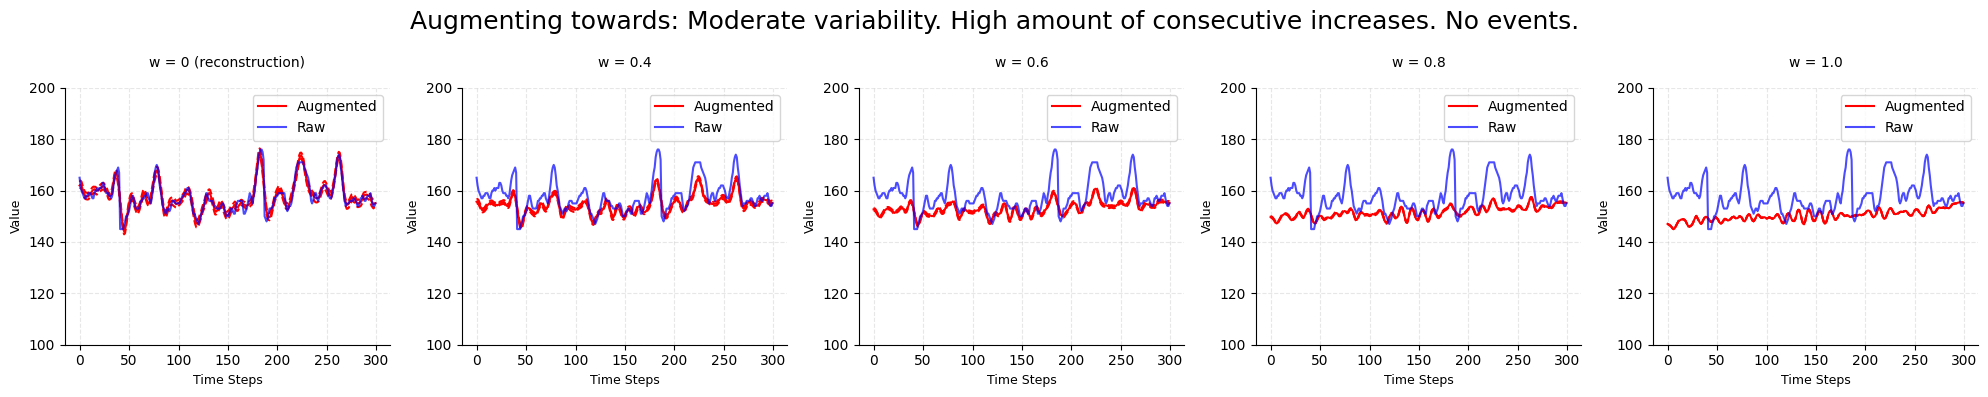

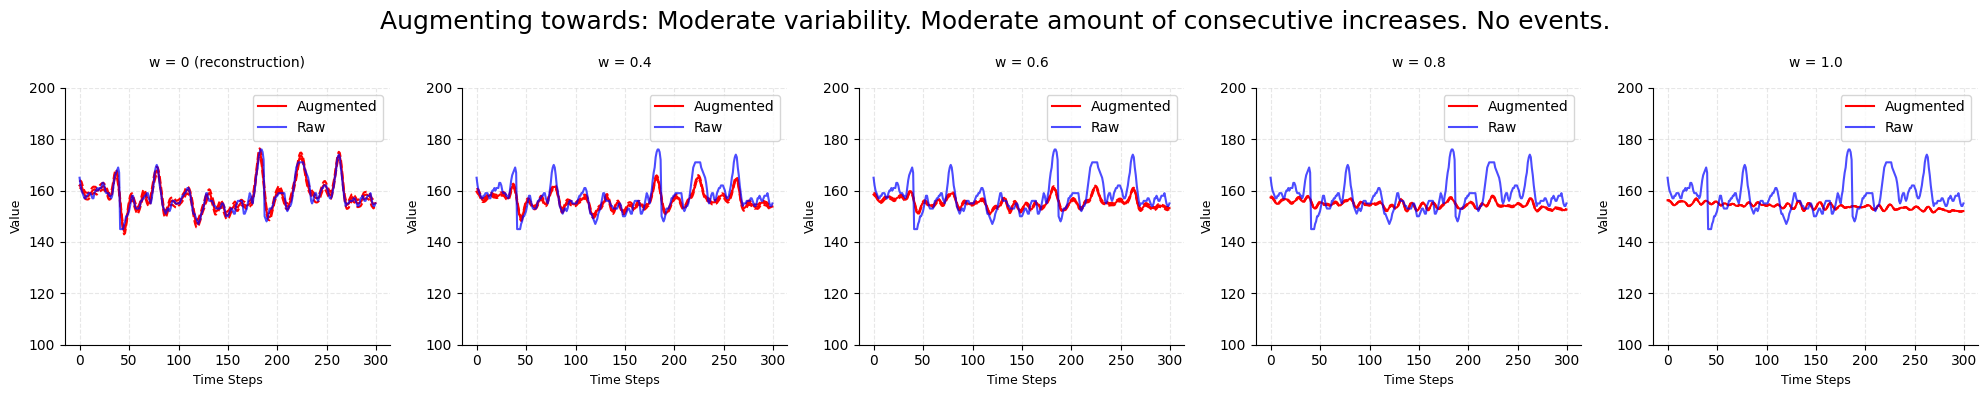

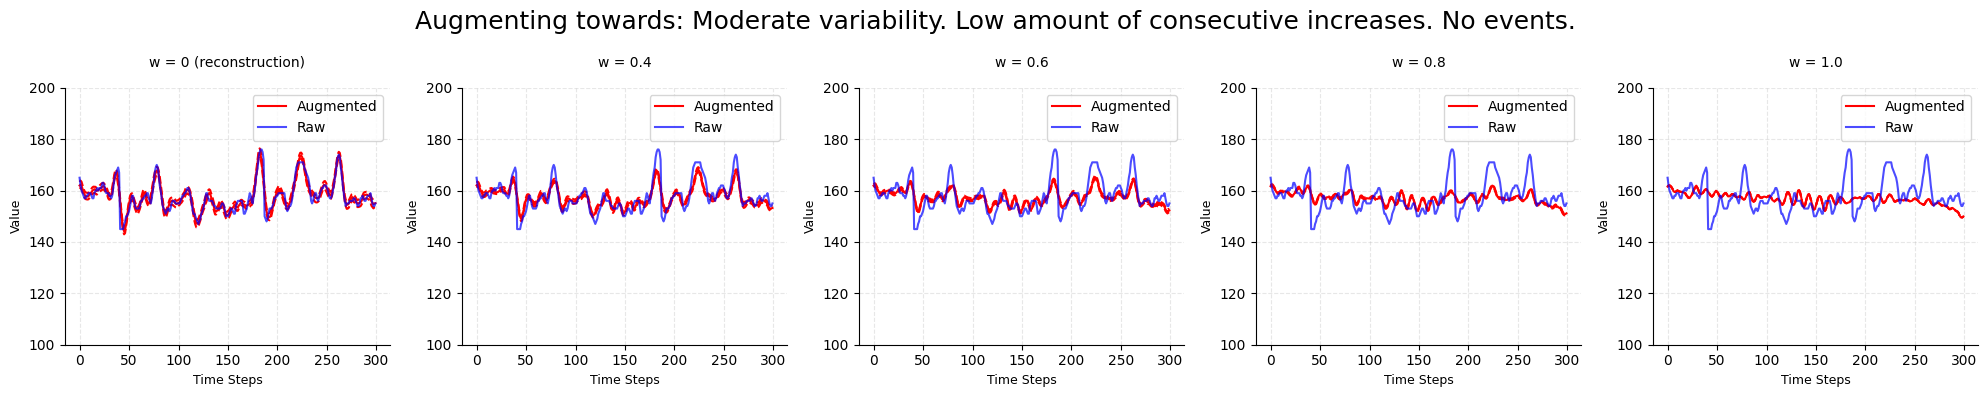

0    Moderate amount of consecutive increases.
Name: description_succ_inc, dtype: object


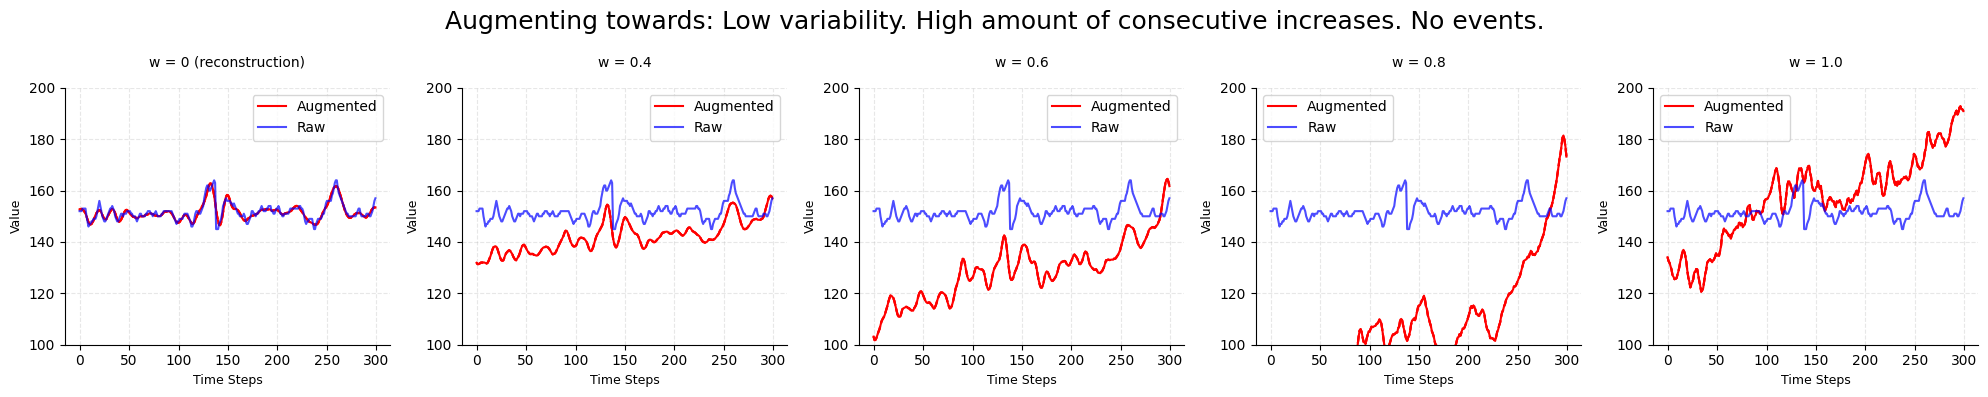

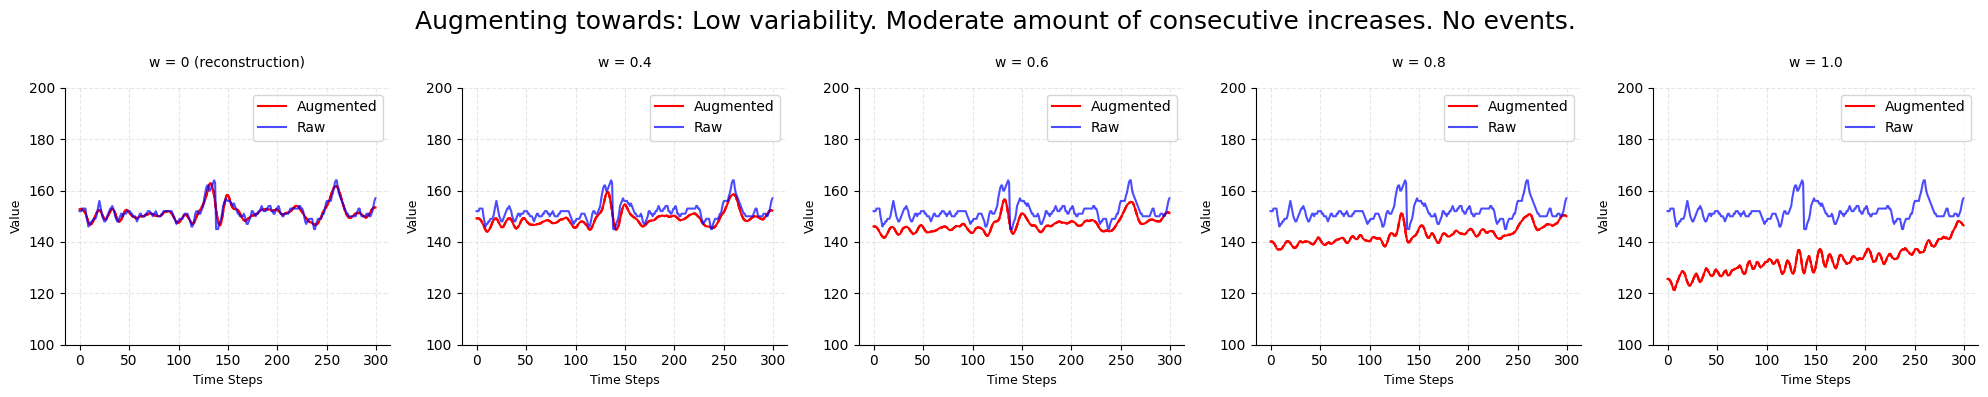

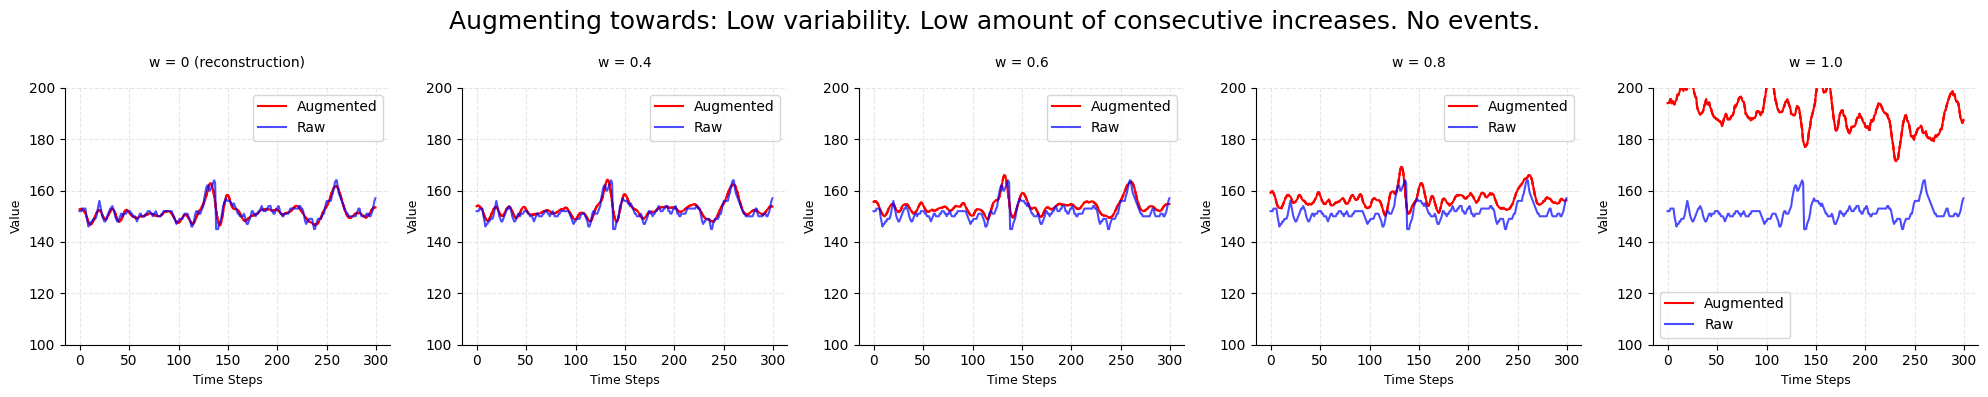

0    Low amount of consecutive increases.
Name: description_succ_inc, dtype: object


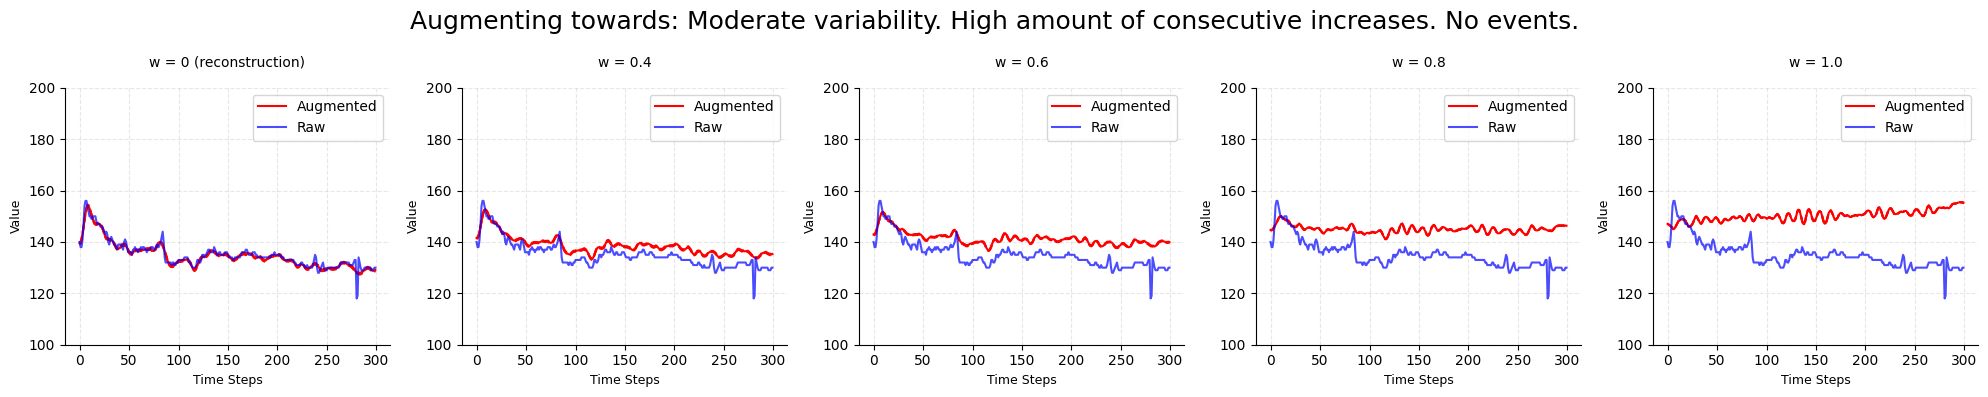

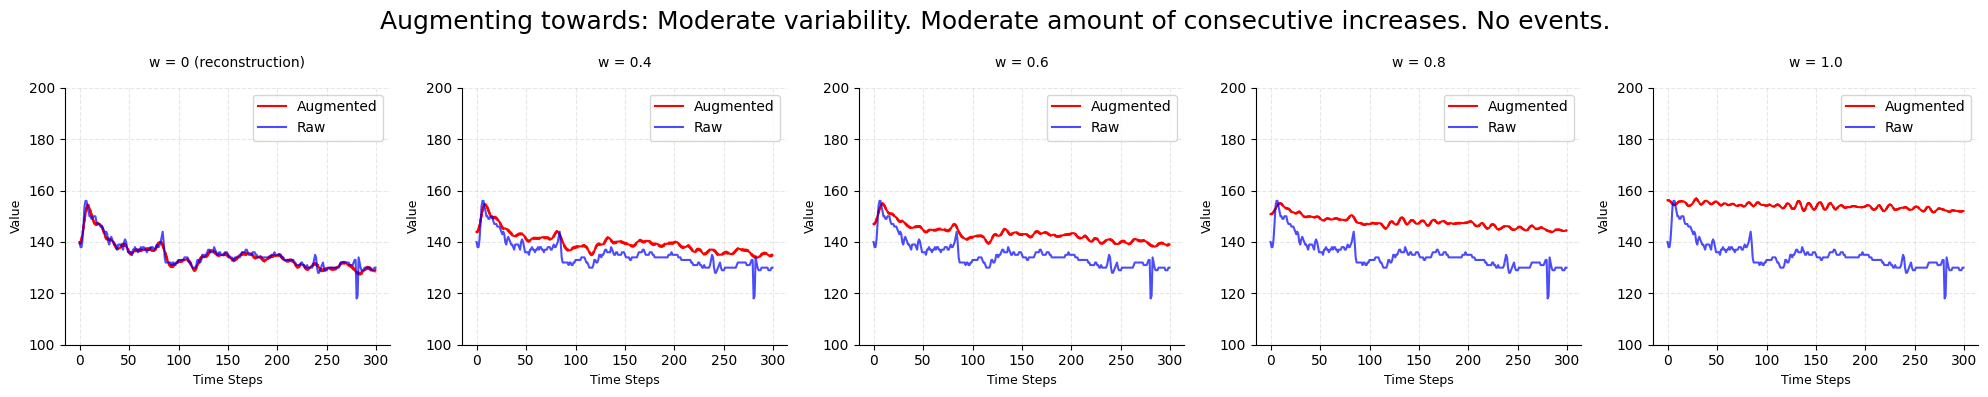

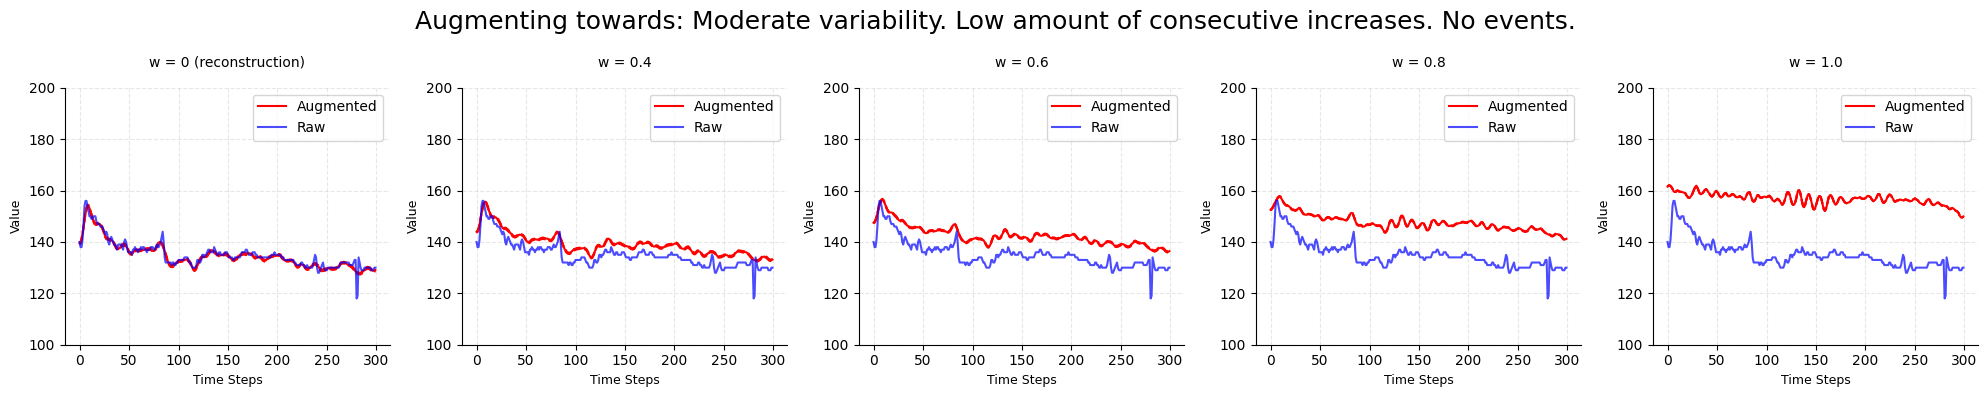

0    Moderate variability.
Name: description_histogram, dtype: object


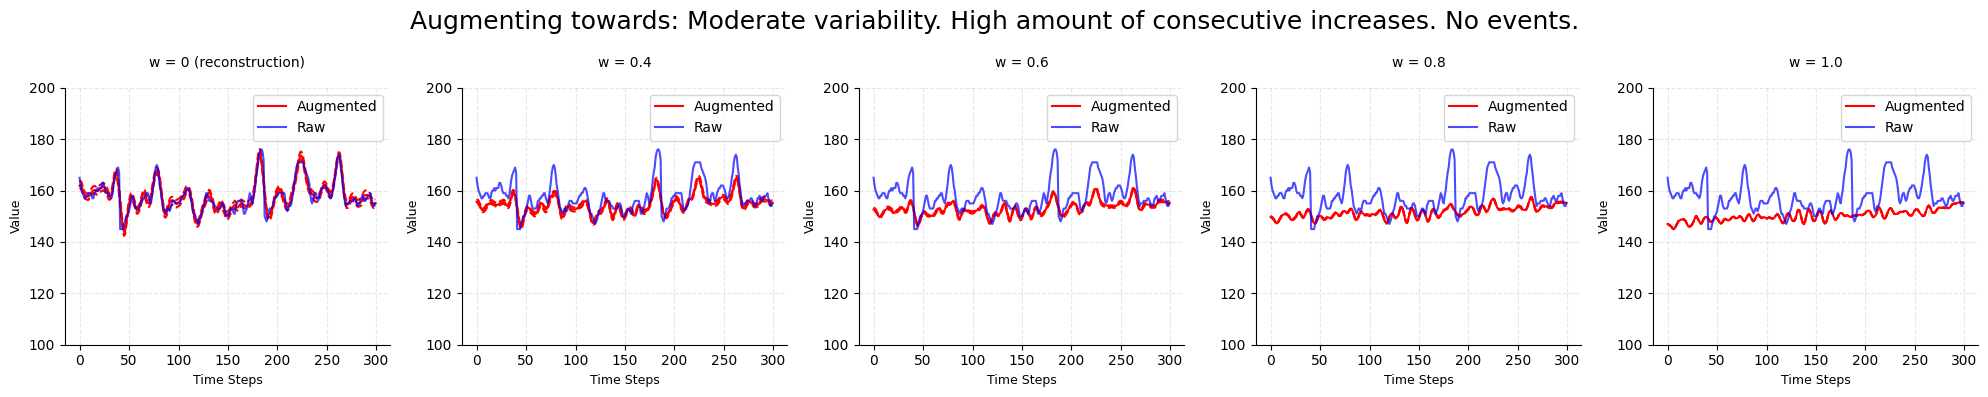

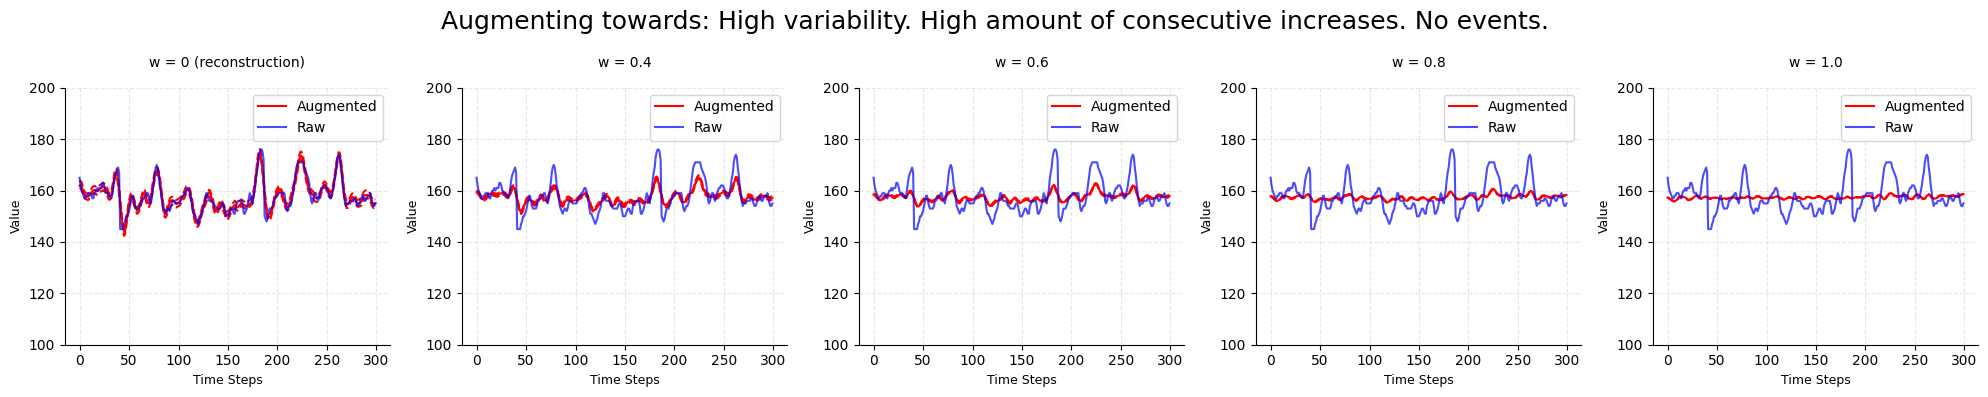

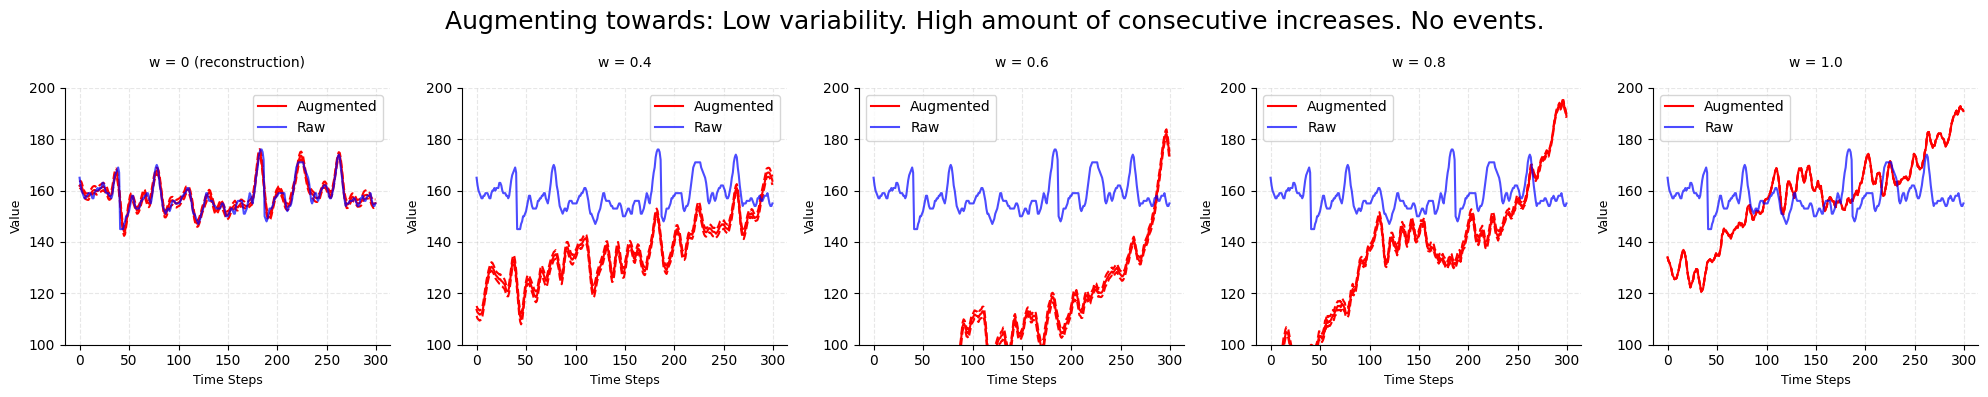

0    High variability.
Name: description_histogram, dtype: object


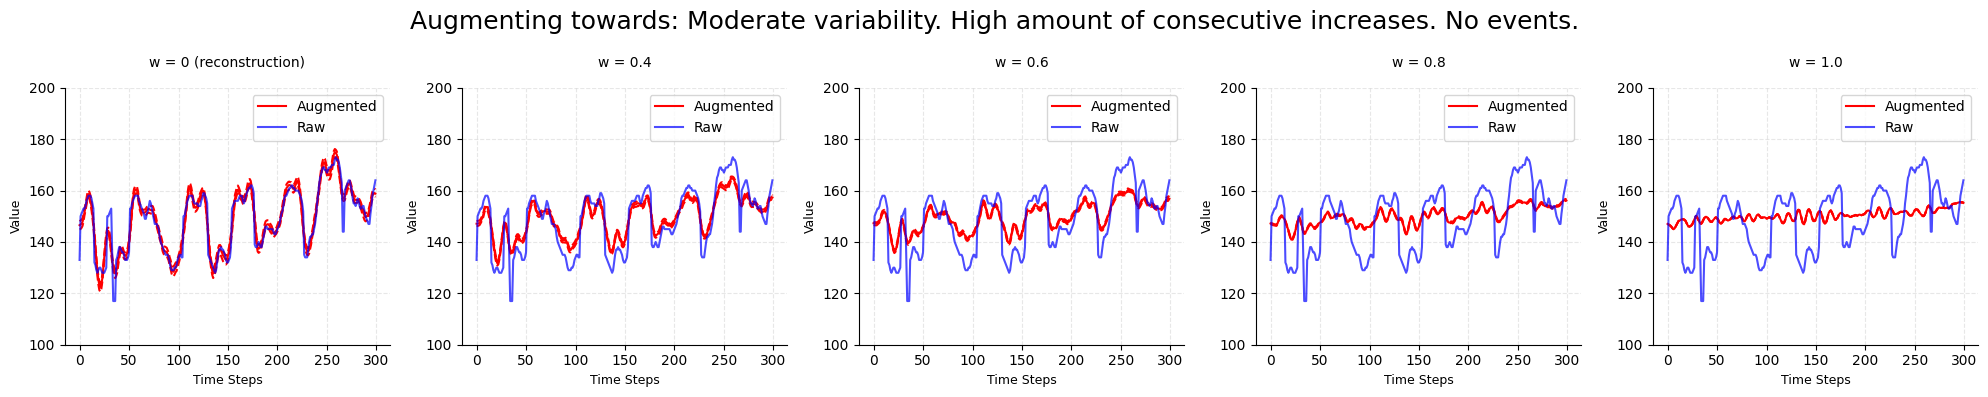

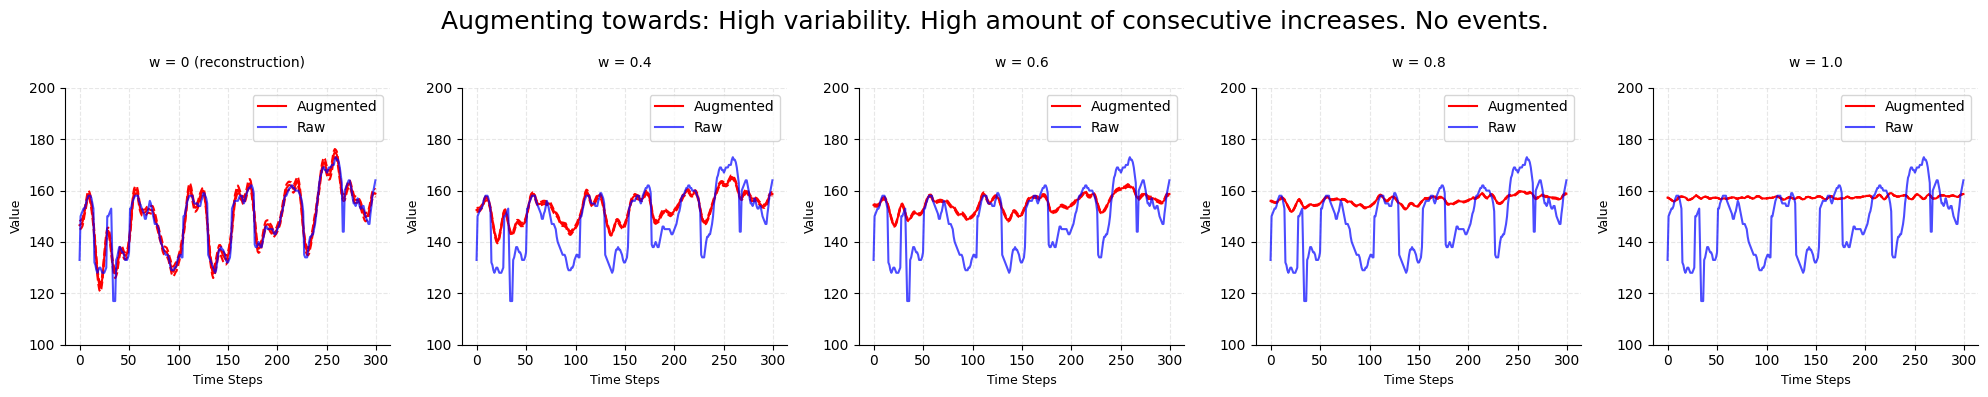

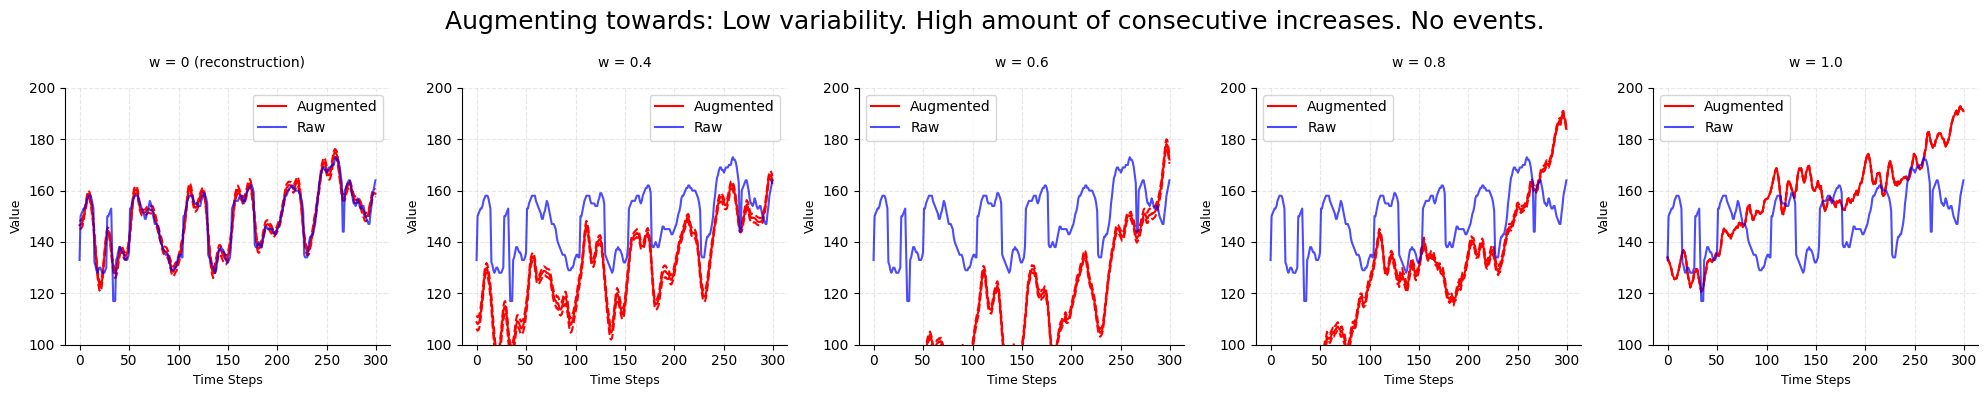

0    Low variability.
Name: description_histogram, dtype: object


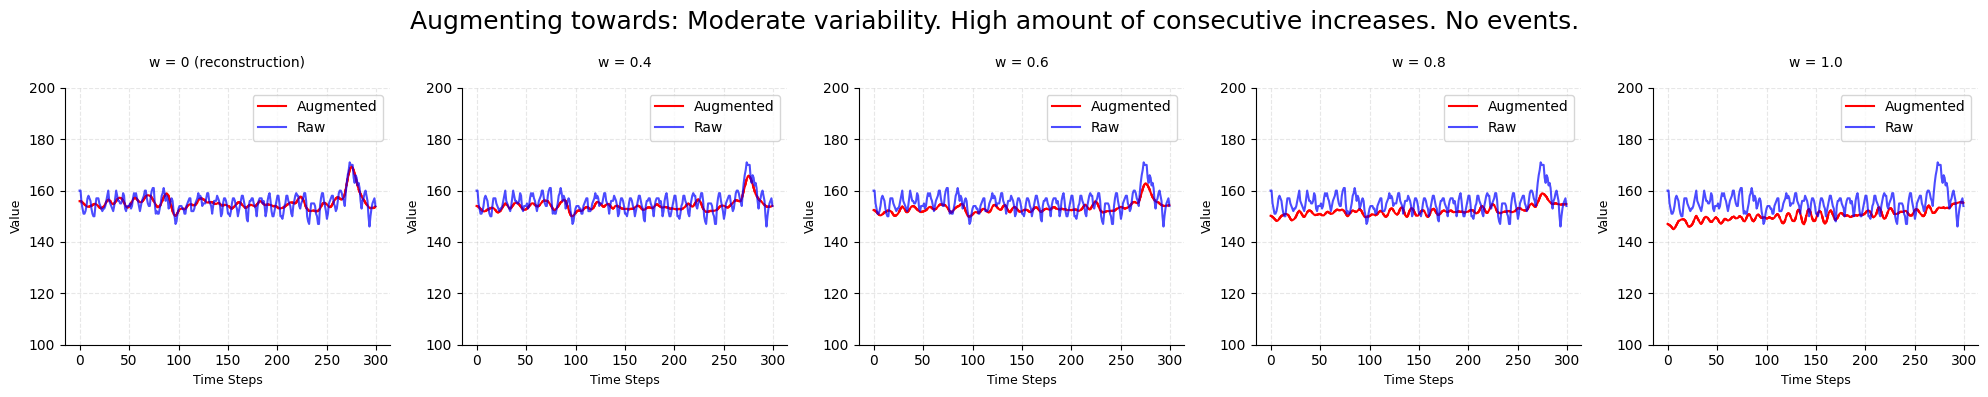

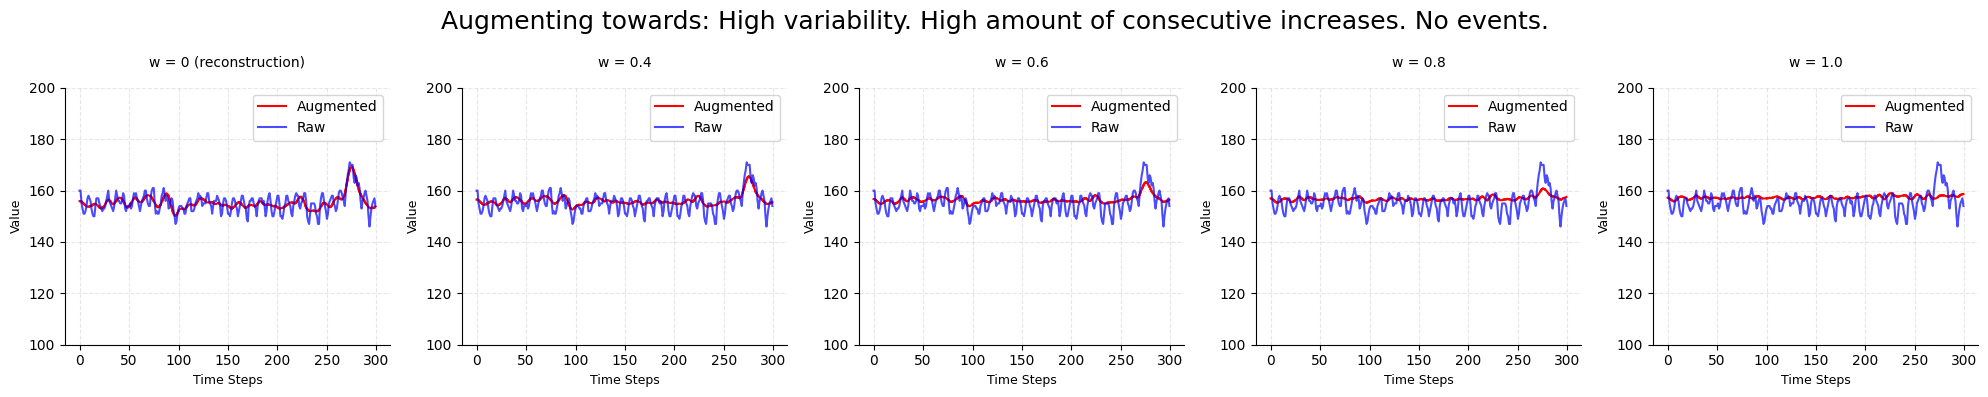

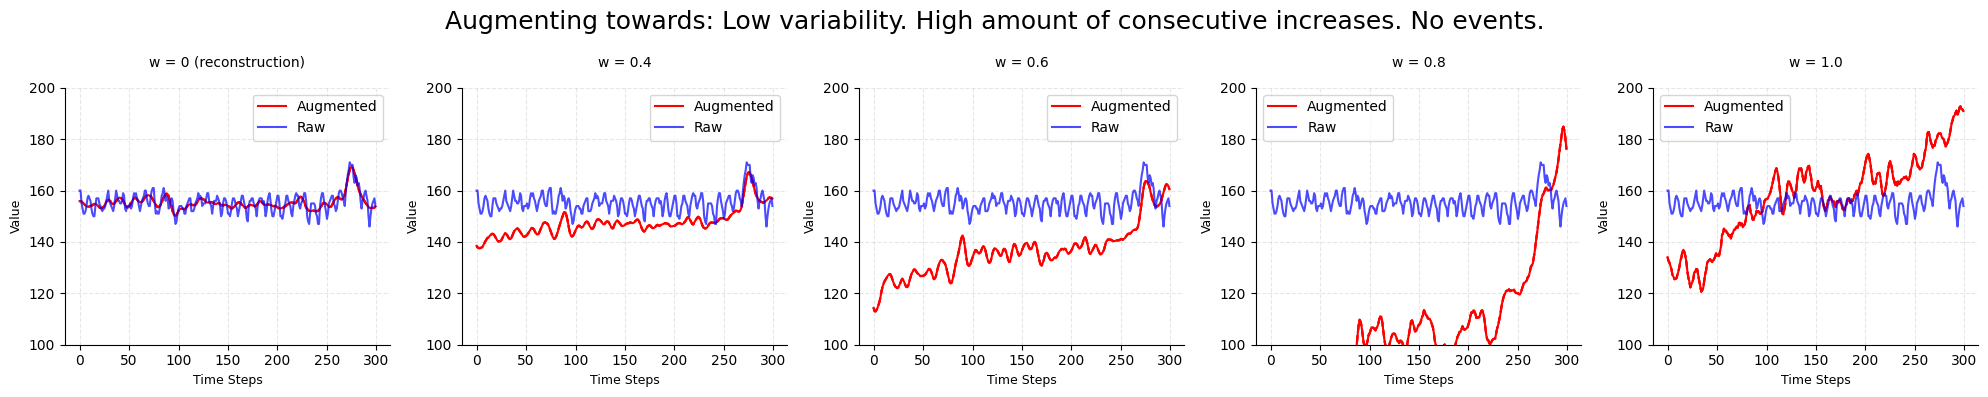

0    No events.
Name: description_ts_event_binary, dtype: object


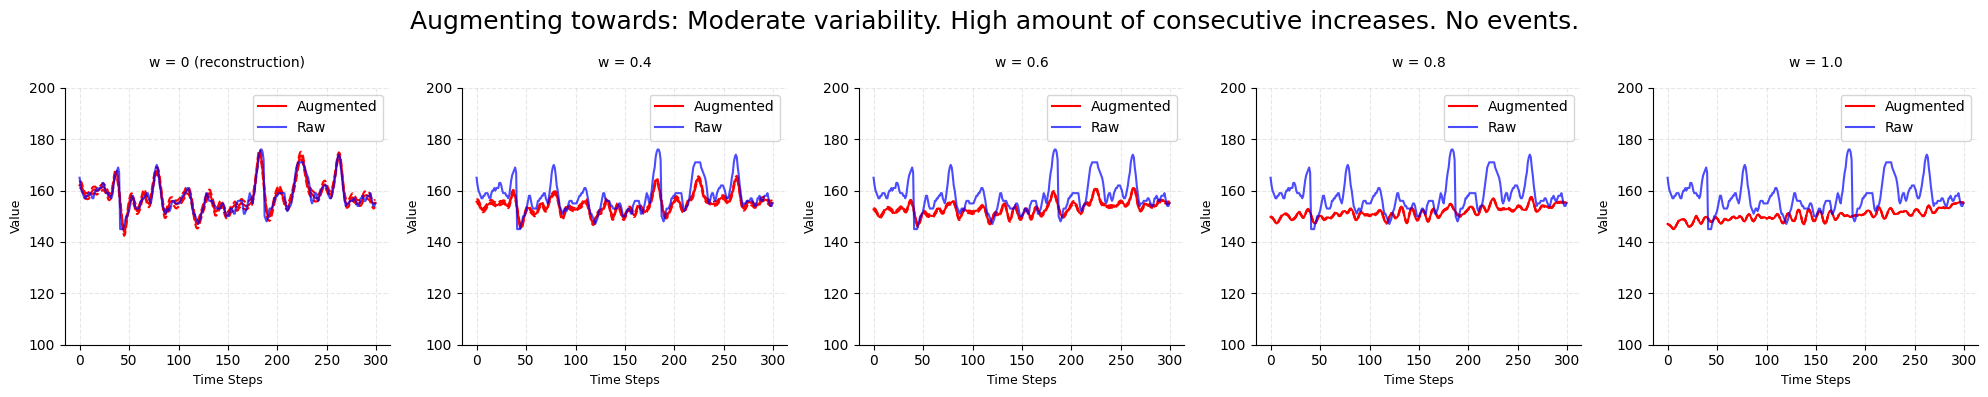

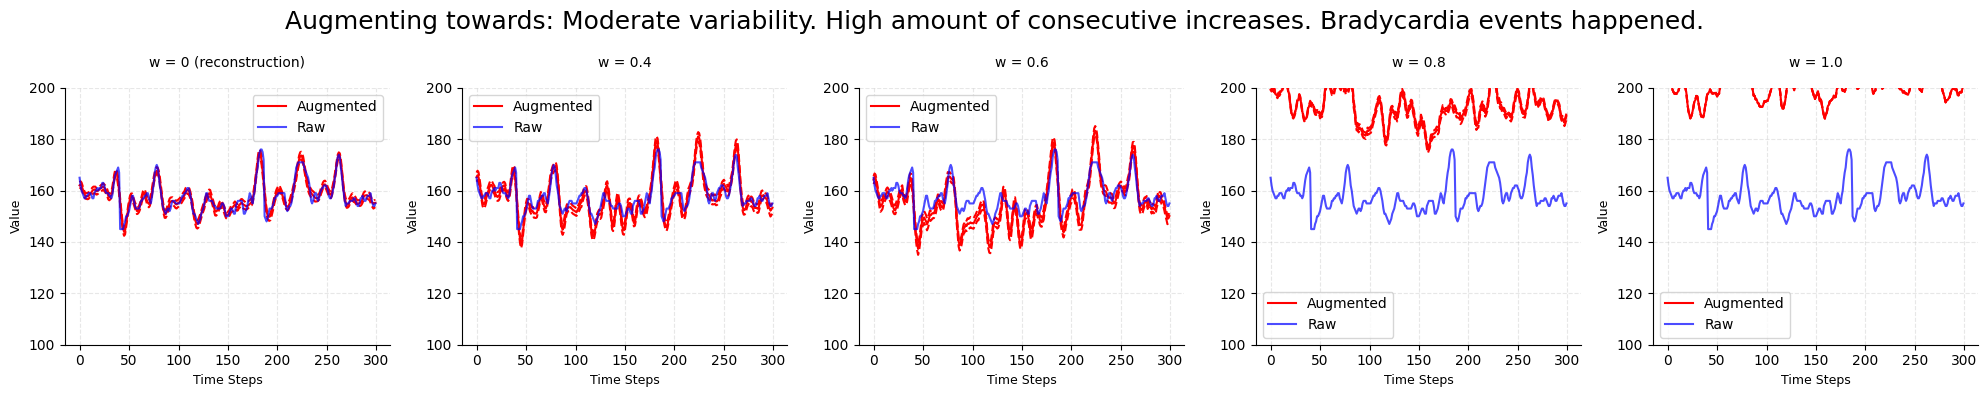

0    Bradycardia events happened.
Name: description_ts_event_binary, dtype: object


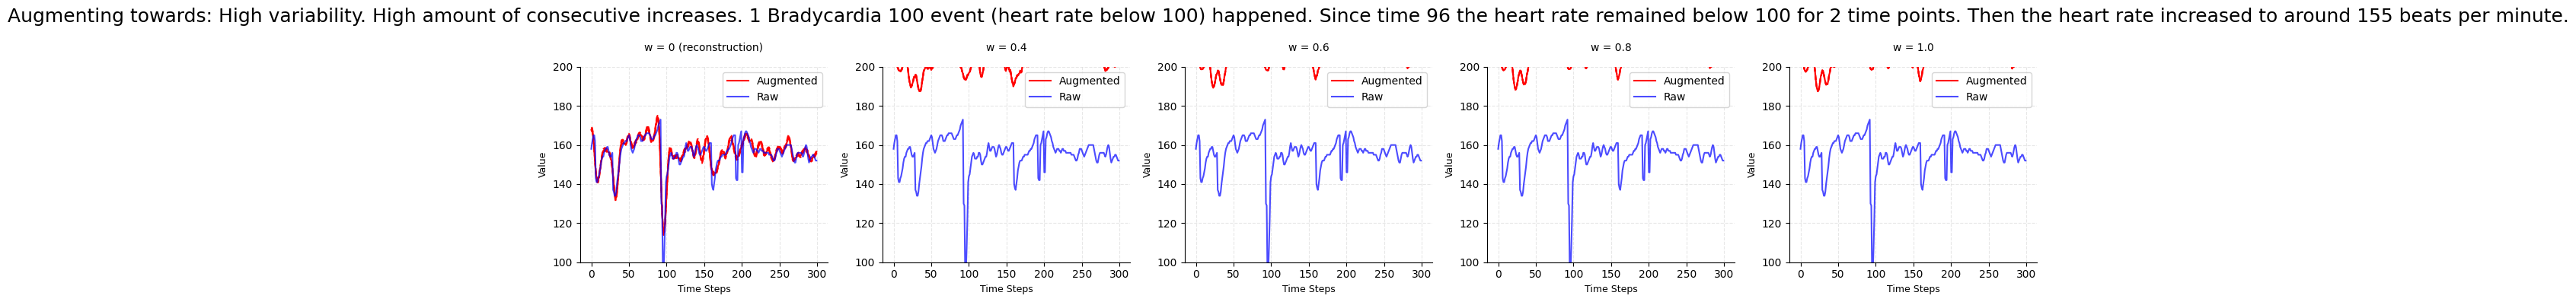

In [6]:
tid=100
viz_generation_conditional(df_left, model, config_dict, tid=tid, sampling=True, b=1, ep=1)

# Eval

In [9]:
with open('run/eval.py', 'r') as file:
    exec(file.read())

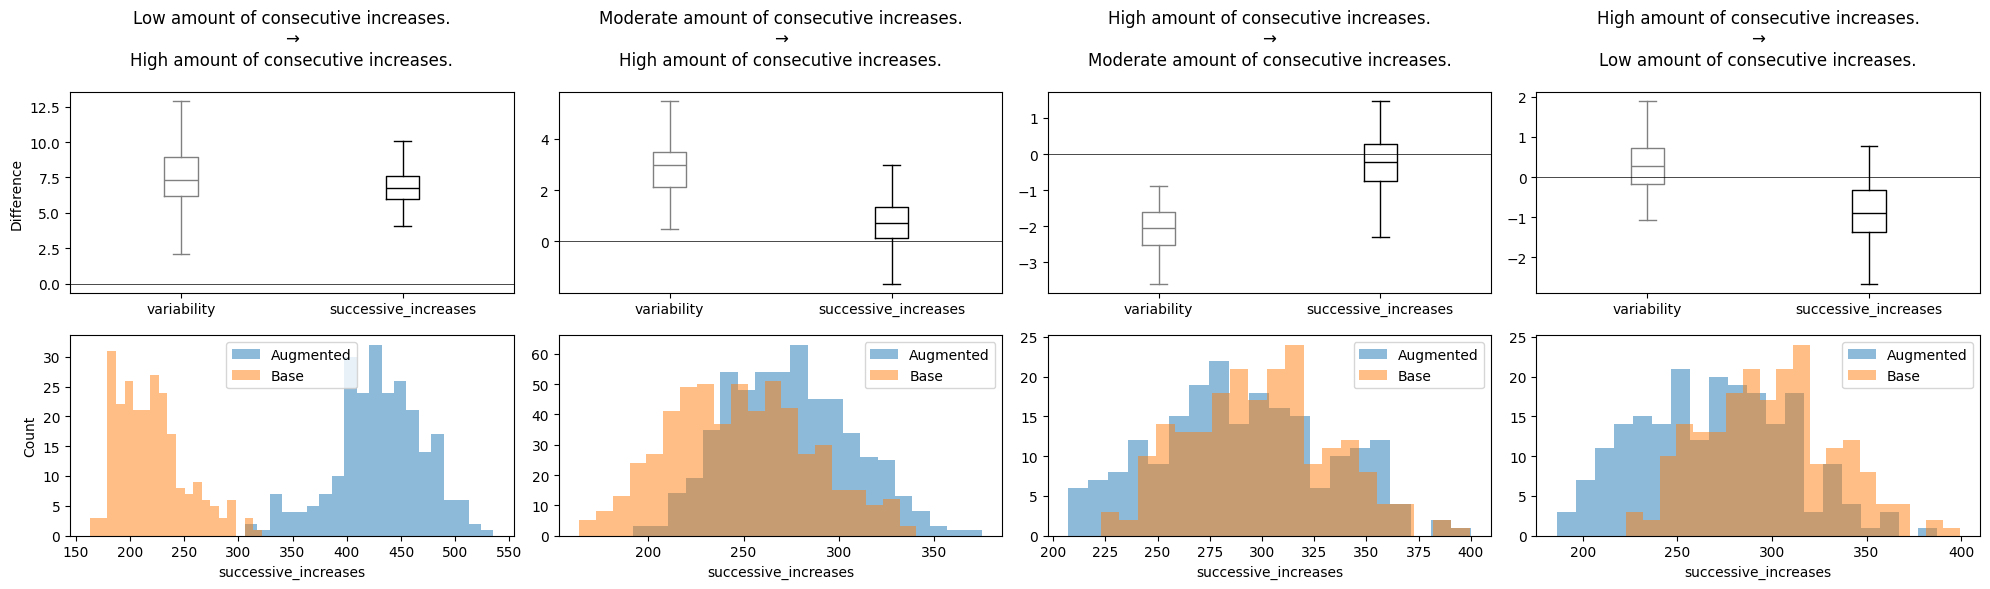

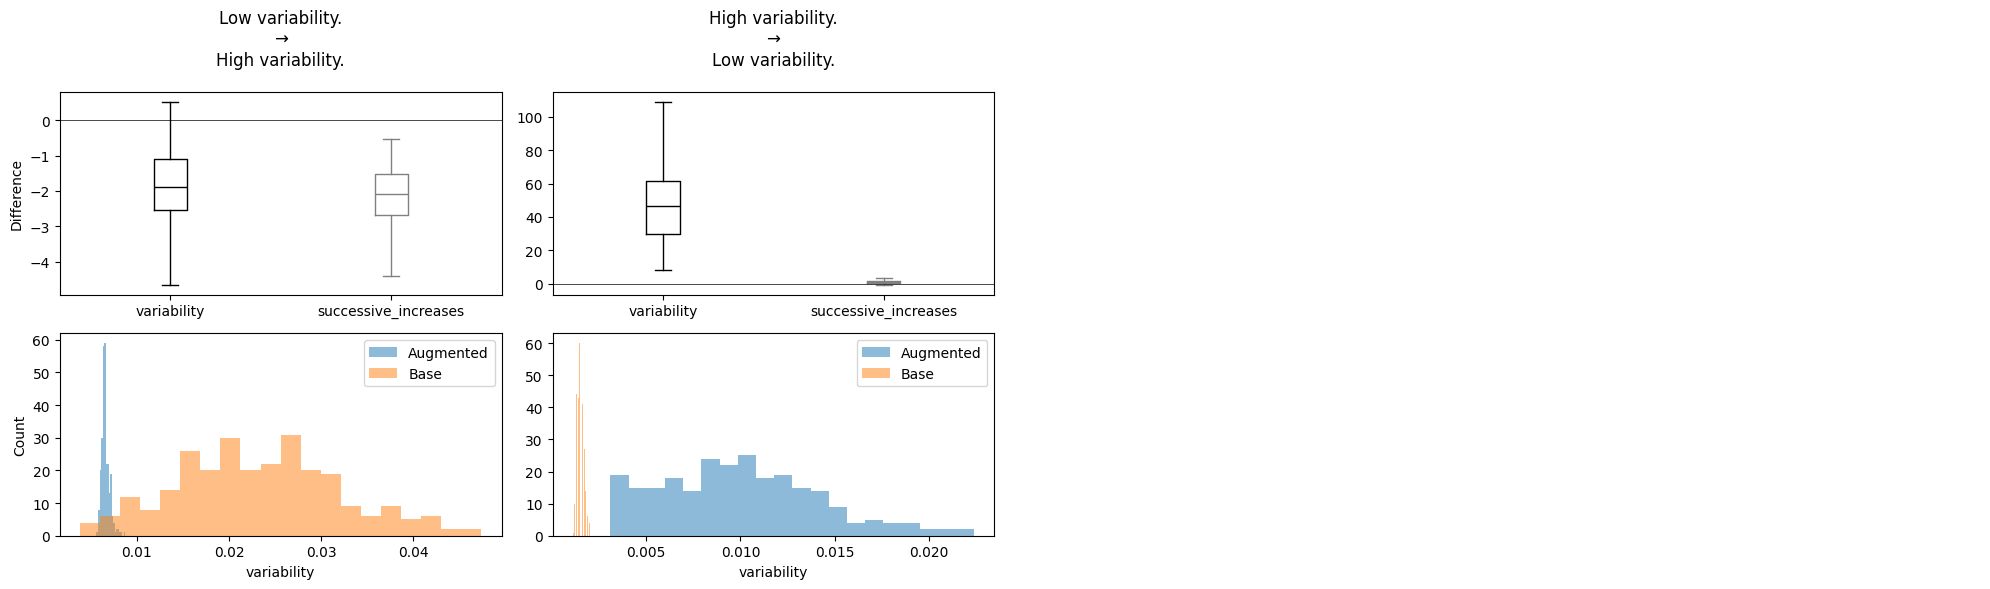

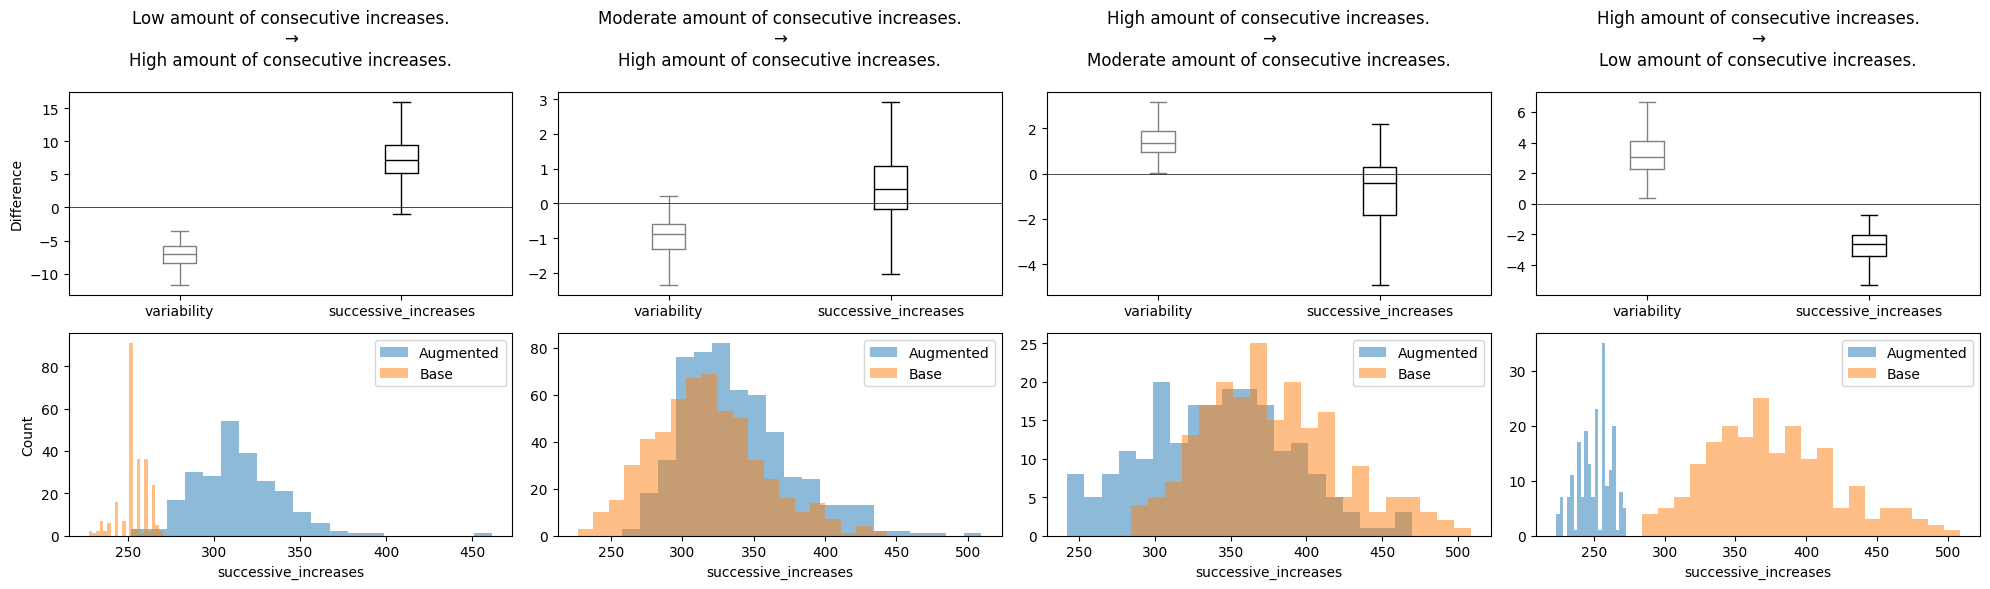

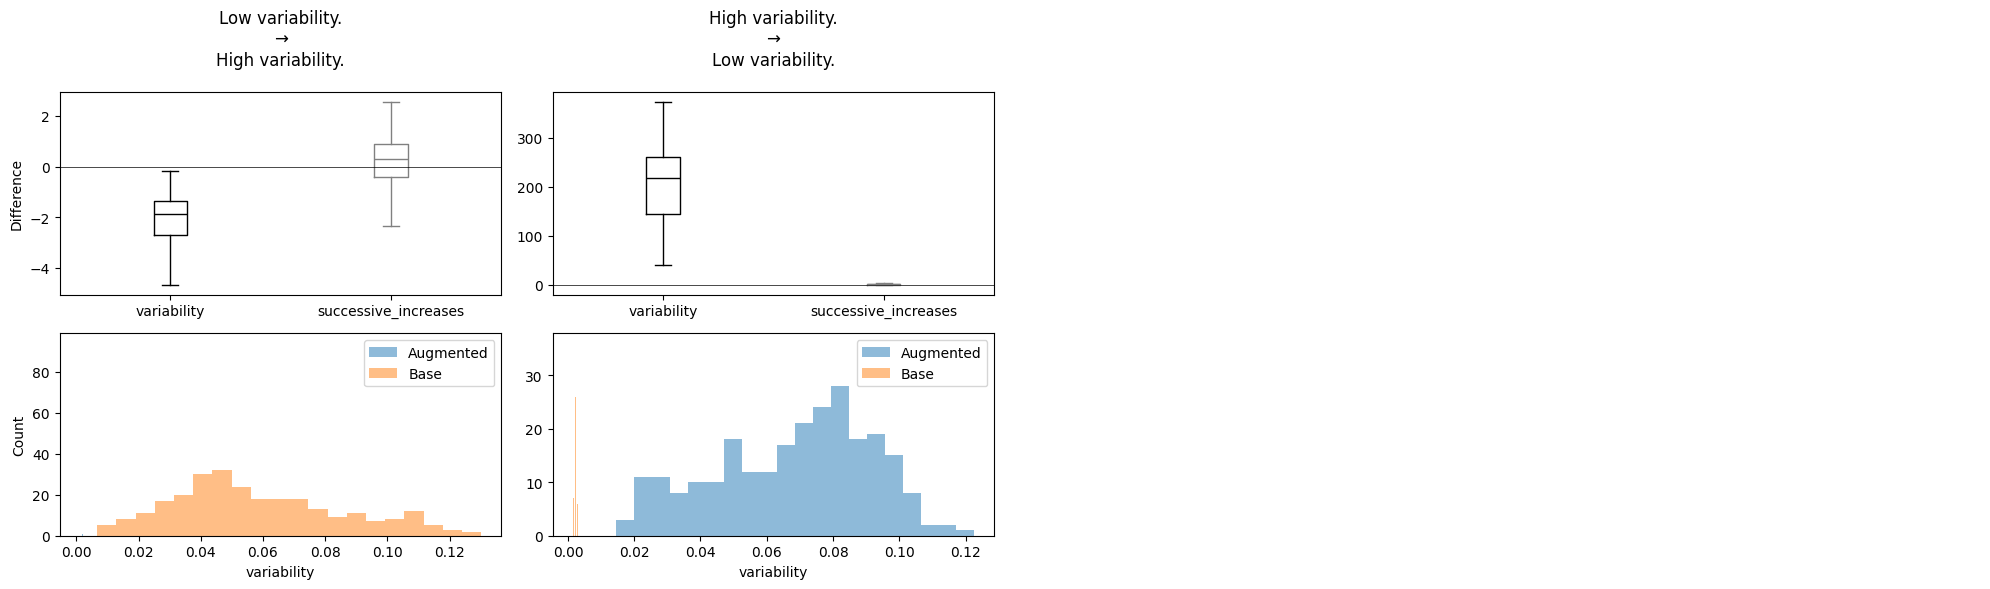

In [10]:
df_stats_condi = eng_math_diff_multiple(df_stats_all, base_aug_dict, aug_type='conditional')# 
df_stats_margi = eng_math_diff_multiple(df_stats_all, base_aug_dict, aug_type='marginal')# 
df_stats_condi['aug_type'] = 'conditional'
df_stats_margi['aug_type'] = 'marginal'
df_stats = pd.concat([df_stats_condi, df_stats_margi], ignore_index=True)


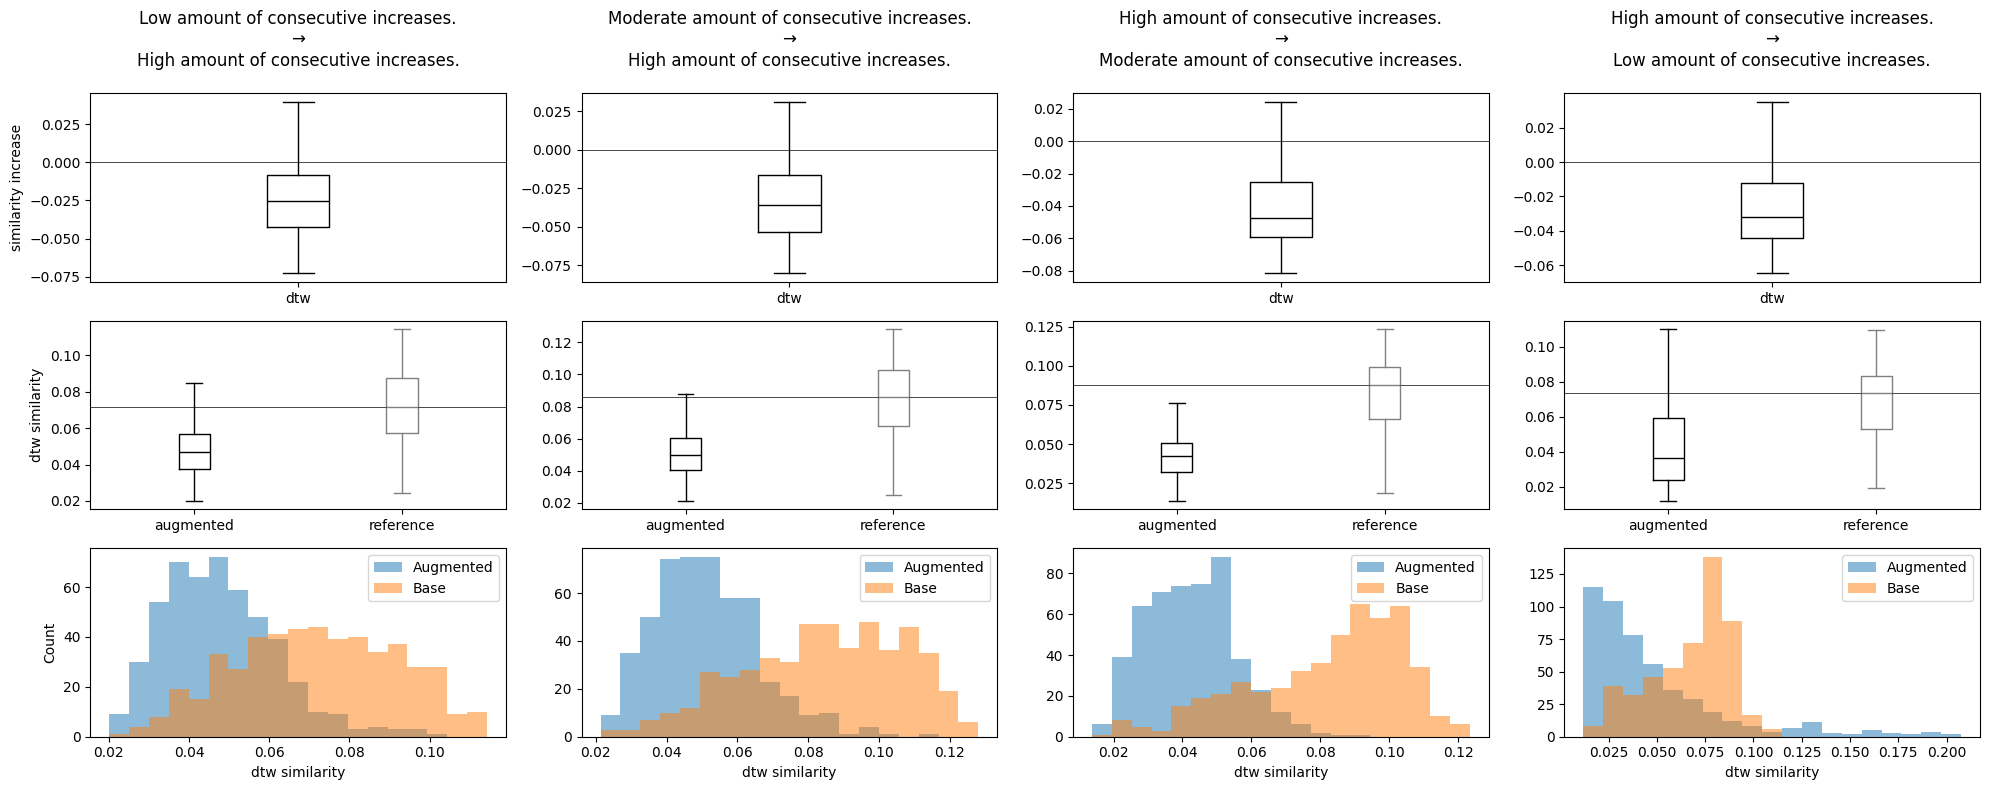

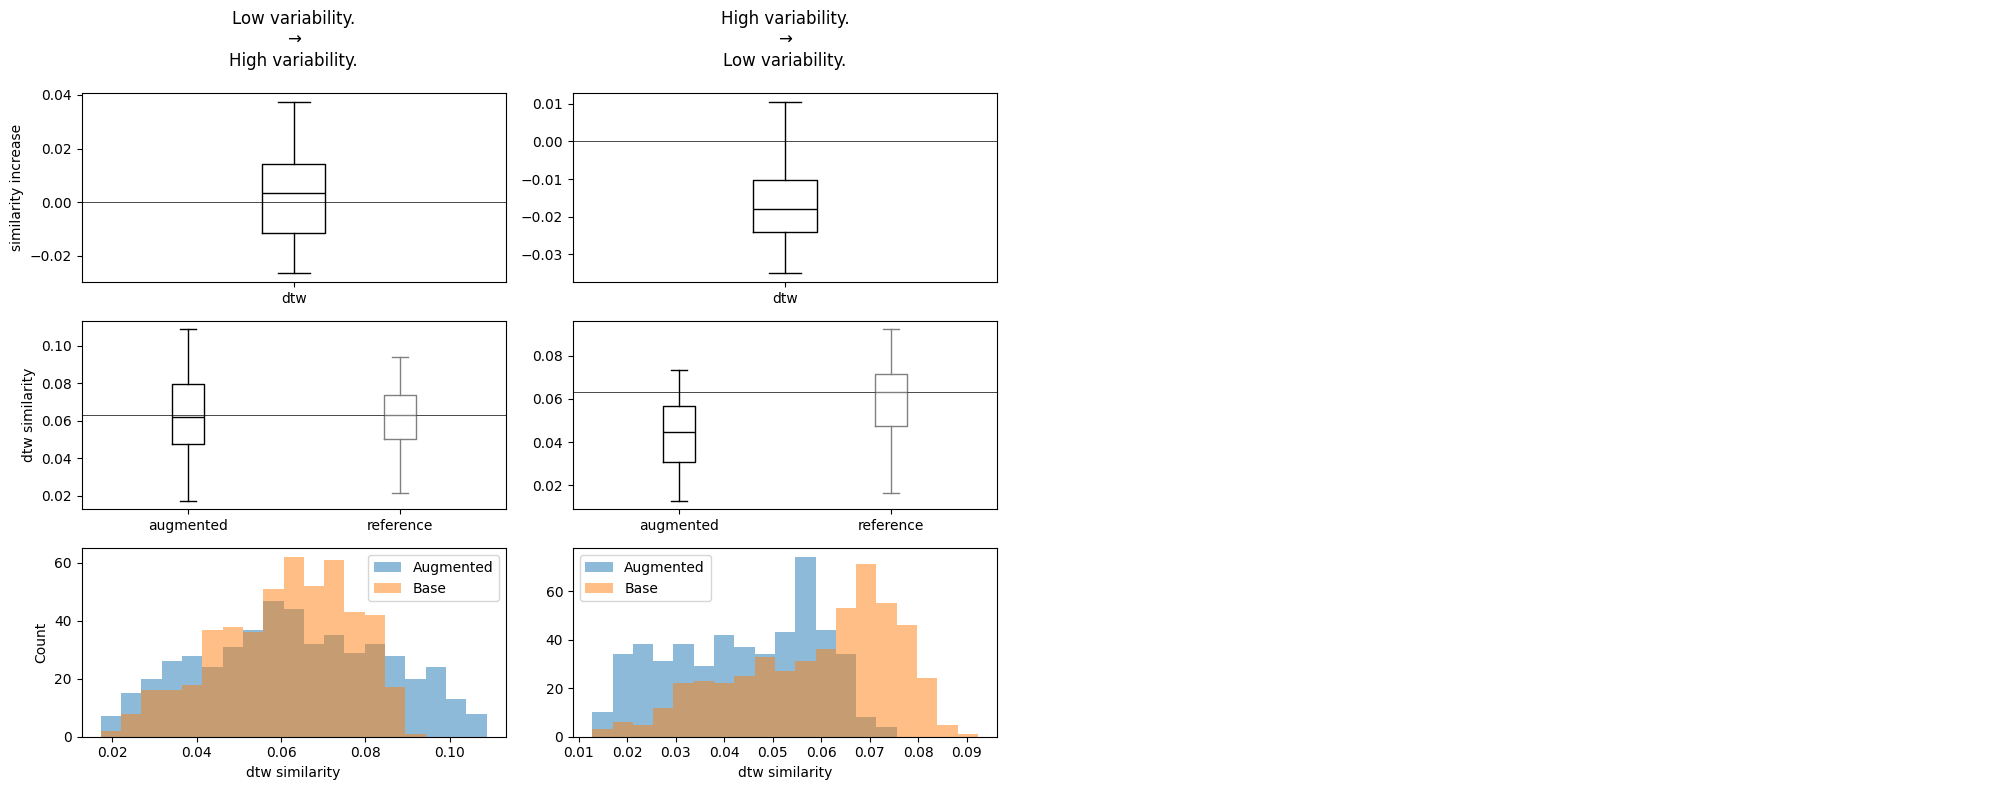

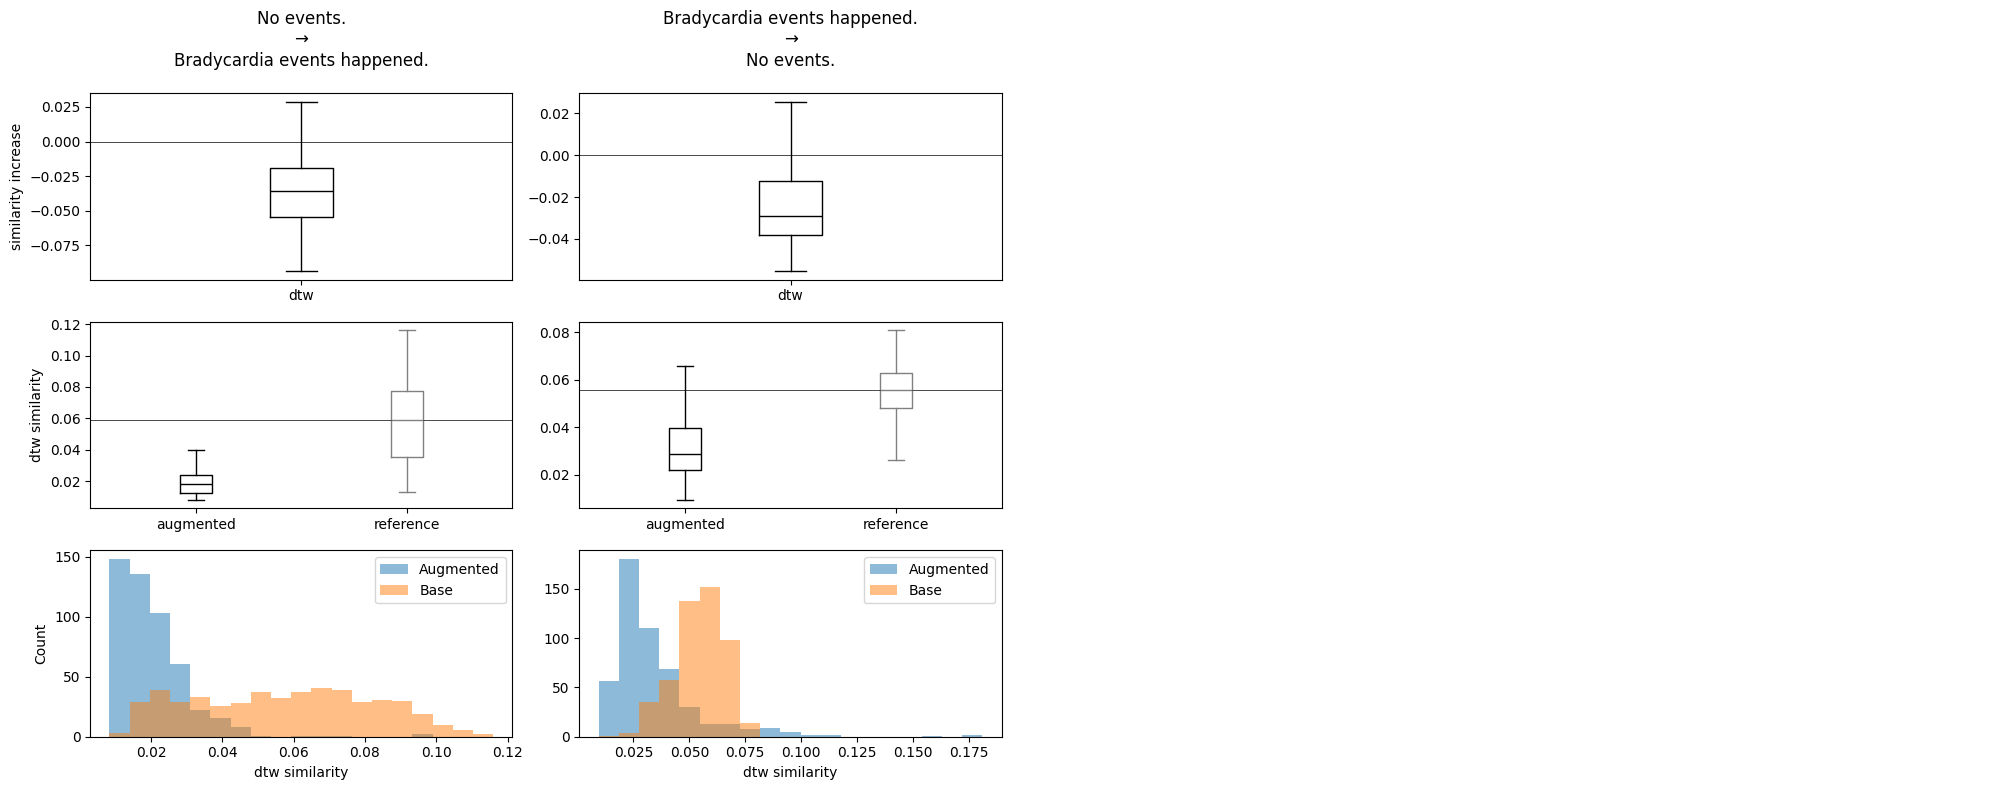

--------------------------------------------------------------------------------


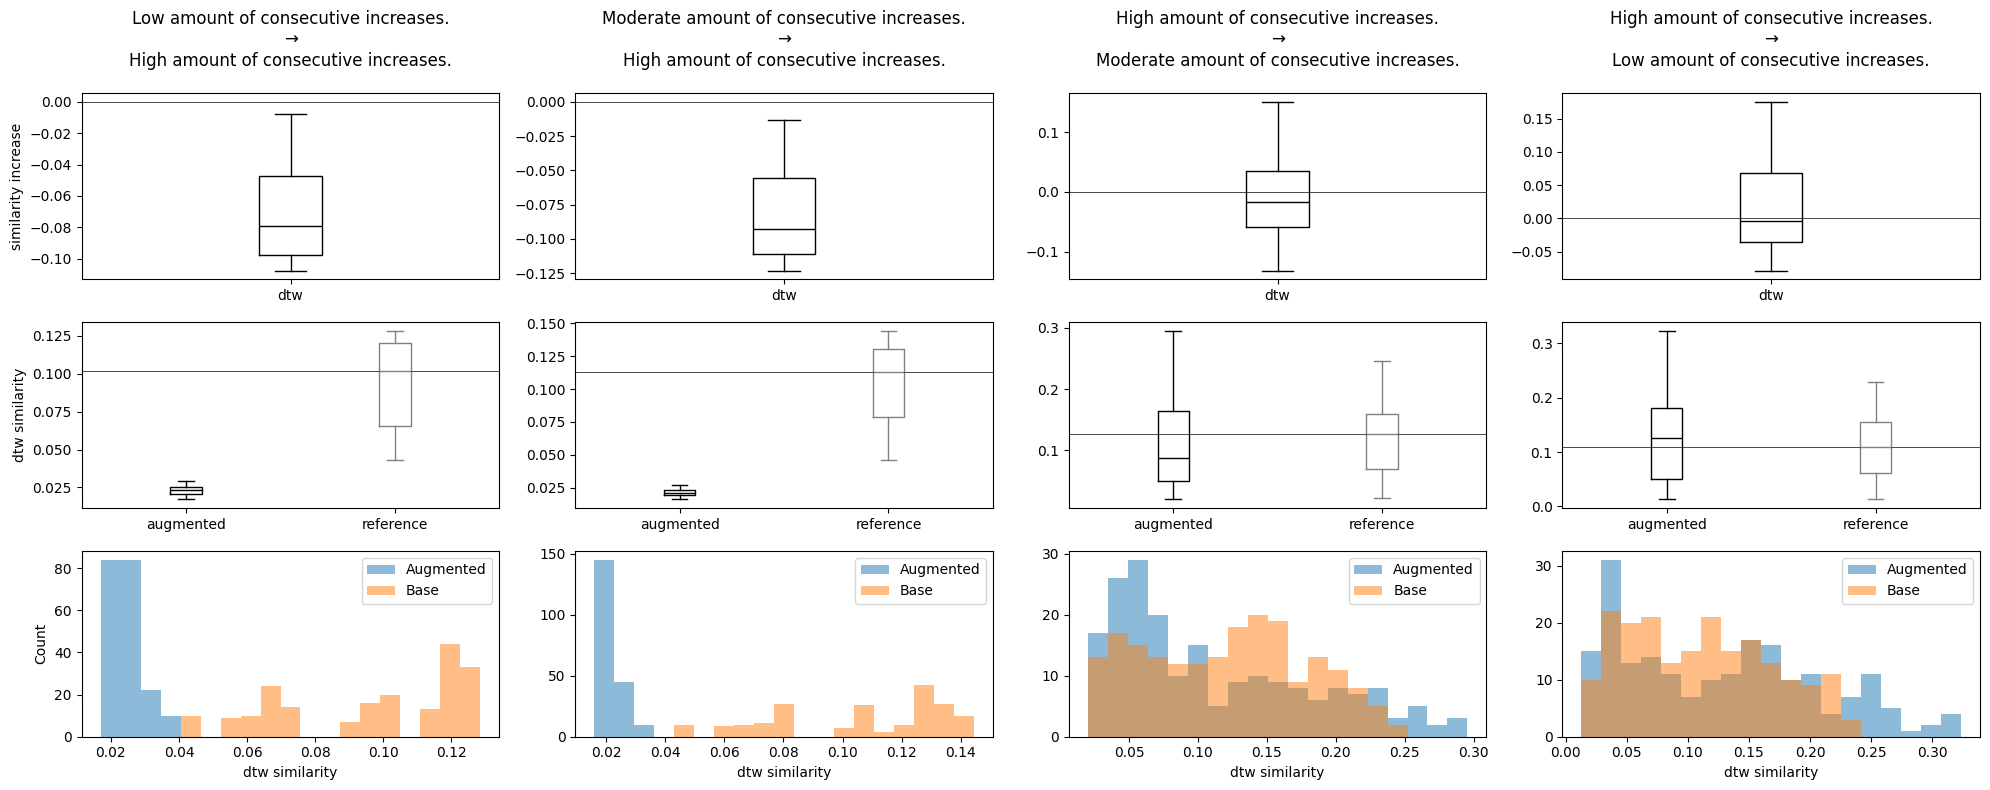

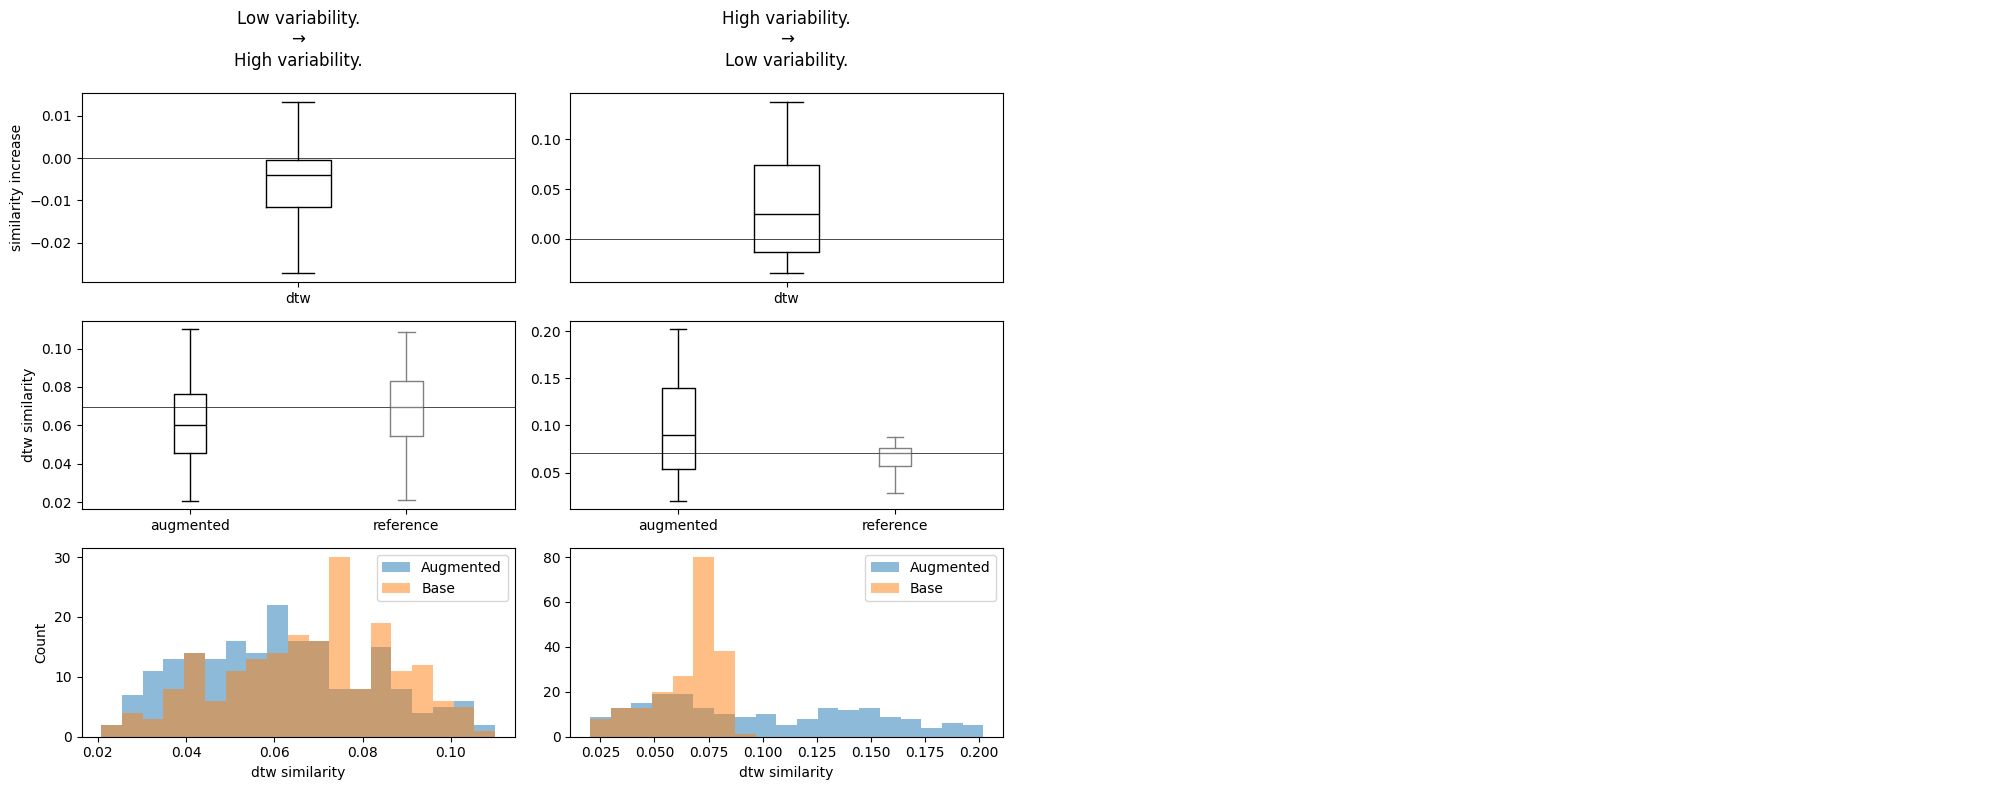

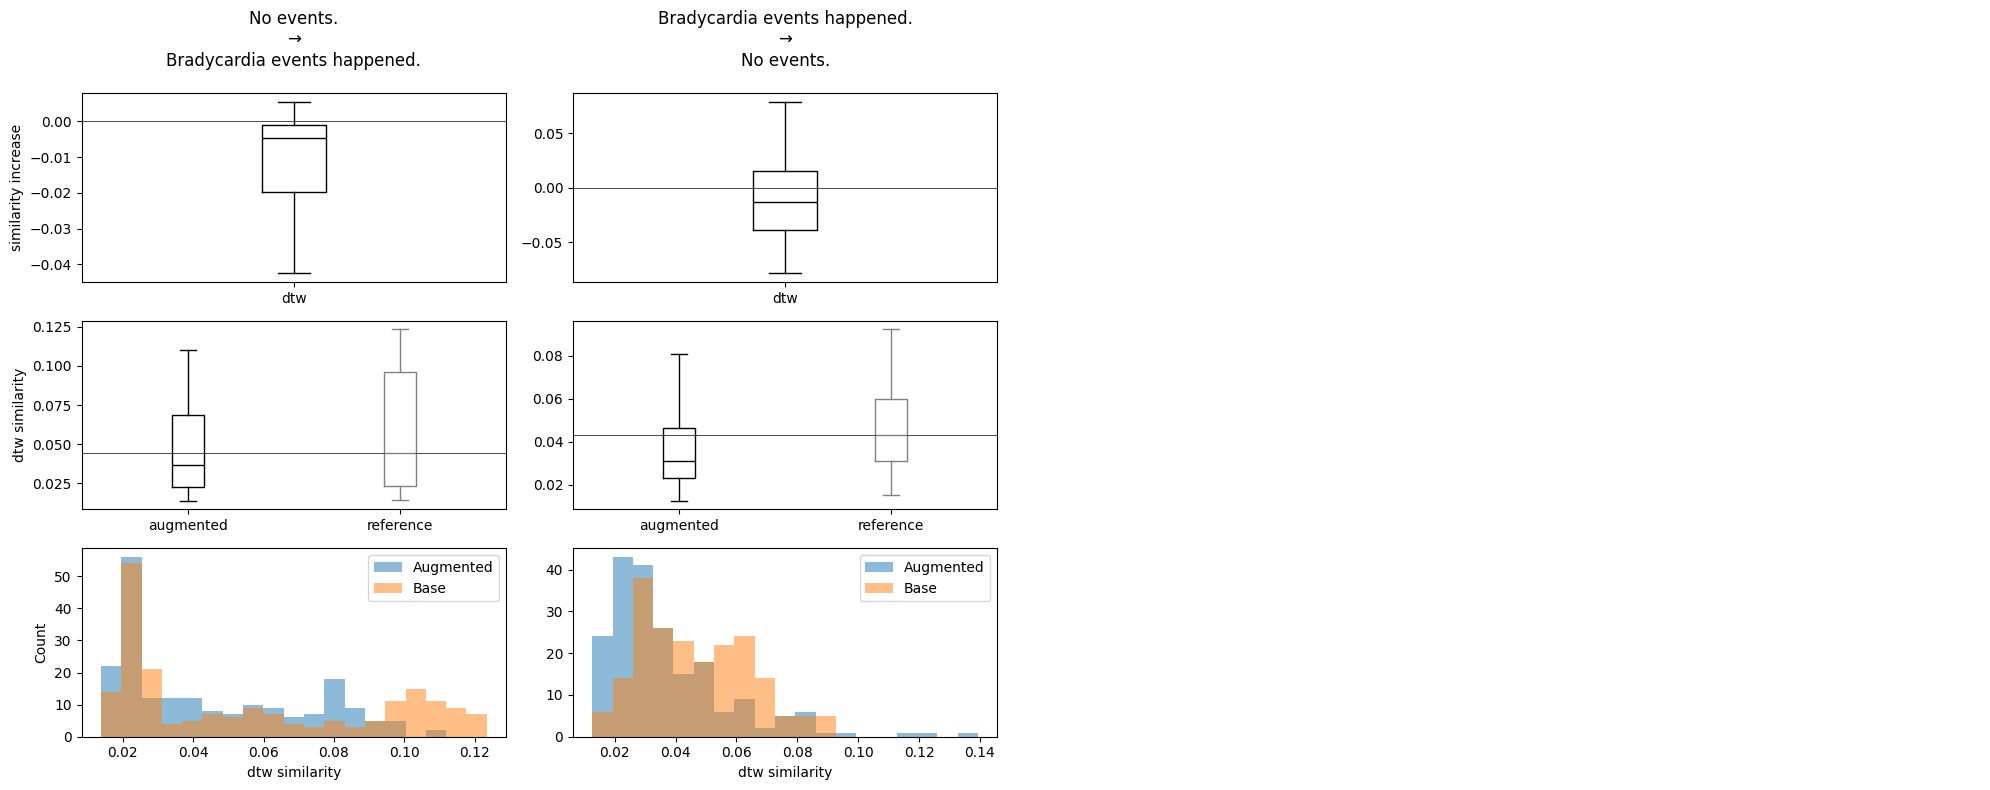

--------------------------------------------------------------------------------


In [11]:
# Define the base augmentation pairs
df_dists_raw = df_dists_ls[0]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae', , 'lcss'
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='marginal')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_margi = df_dists
print('-'*80)

# Define the base augmentation pairs
df_dists_raw = df_dists_ls[1]
df_dists = pd.DataFrame()
for metric in ['dtw']: # 'mse', 'mae',, 'lcss' 
    df = eng_dists_multiple(df_dists_raw, base_aug_dict, metric = metric, aug_type='conditional')
    df_dists = pd.concat([df_dists, df], ignore_index=True)
df_dists_condi = df_dists
print('-'*80)

df_dists_all = pd.concat([df_dists_margi, df_dists_condi], ignore_index=True)

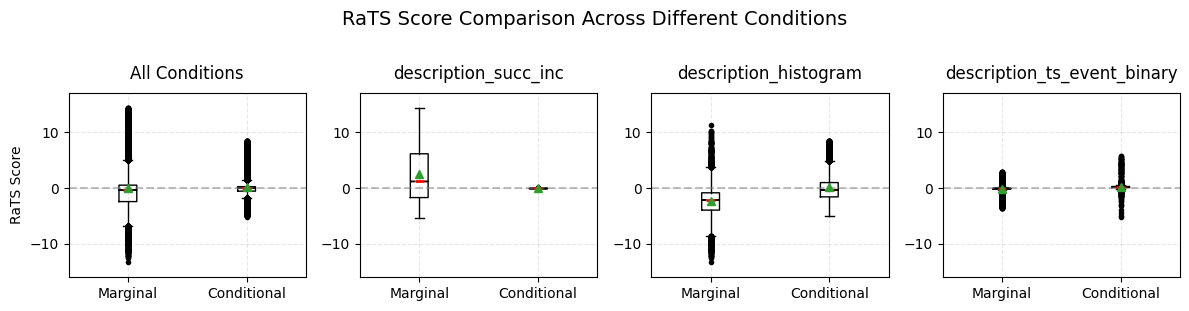

In [12]:
df_rats_margi = df_rats_ls[0]
df_rats_margi = df_rats_margi[df_rats_margi['aug_type'] == 'marginal']
df_rats_condi = df_rats_ls[1]
df_rats_condi = df_rats_condi[df_rats_condi['aug_type'] == 'conditional']
df_rats_all = pd.concat([df_rats_margi, df_rats_condi], ignore_index=True)

df_rats_all.dropna(inplace=True)
fig = plot_rats(df_rats_all, figsize=(12, 3))
plt.show()
